In [16]:
## CHESS ENGINE EVALUTOR

In [17]:
!pip install python-chess berserk

In [18]:
import berserk

# Initialize a berserk.Client object
client = berserk.Client()

# Fetch the last 10 games for 'MagnusCarlsen'
print("Fetching games for MagnusCarlsen...")
games_generator = client.games.export_by_player('MagnusCarlsen', max=500)

# Convert the generator to a list
games_list = list(games_generator)

# Print the number of games fetched
print(f"Number of games fetched: {len(games_list)}")

# Display the first game to verify structure
if games_list:
    print("First game data:")
    print(games_list[0])

Fetching games for MagnusCarlsen...
Number of games fetched: 2
First game data:
{'id': '19o9Pq0s', 'rated': True, 'variant': 'atomic', 'speed': 'blitz', 'perf': 'atomic', 'createdAt': datetime.datetime(2022, 6, 23, 20, 6, 46, 294000, tzinfo=datetime.timezone.utc), 'lastMoveAt': datetime.datetime(2022, 6, 23, 20, 12, 36, 583000, tzinfo=datetime.timezone.utc), 'status': 'mate', 'source': 'arena', 'players': {'white': {'user': {'name': 'MagnusCarlsen', 'title': 'GM', 'id': 'magnuscarlsen'}, 'rating': 1641, 'ratingDiff': 343, 'provisional': True}, 'black': {'user': {'name': 'Cedur216', 'flair': 'nature.fire', 'patron': True, 'patronColor': 9, 'id': 'cedur216'}, 'rating': 1923, 'ratingDiff': -6}}, 'winner': 'white', 'moves': 'Nf3 f6 e3 e6 Nd4 Bb4 c3 f5 Qh5+ g6 Qg5 Qxg5 Nb5 Nf6 f3 O-O Nxa7 Ne4 d4 Nd2 Bb5 Nxb1 Bxd7 Bd6 f4 g5 g3 h5 h4 gxf4 Kd1 Kh7 Rf1 c6 e4 f4 gxf4 Bf4 b4 Rg8 Rg1 Bg3 a4 b6 c4 e5 Kc2 exd4 Kb1 Rd8 Rd1 Rf8 Rd7+ Rf7 Rxf7 Bxh4 e5 Kg7 e6 Kf8 e7+ Ke8 a5 bxa5 b5 h4 b6 h3 b7 h2 b8=Q+ K

In [19]:
import chess
import numpy as np

def board_to_matrix(board):
    # Initialize 8x8x12 matrix
    # Layers: 0-5 White (P, N, B, R, Q, K), 6-11 Black (P, N, B, R, Q, K)
    matrix = np.zeros((8, 8, 12), dtype=int)
    piece_type_map = {
        chess.PAWN: 0, chess.KNIGHT: 1, chess.BISHOP: 2,
        chess.ROOK: 3, chess.QUEEN: 4, chess.KING: 5
    }

    for square in chess.SQUARES:
        piece = board.piece_at(square)
        if piece:
            # Calculate layer index
            layer = piece_type_map[piece.piece_type] + (0 if piece.color == chess.WHITE else 6)
            # Map square to row/col (Rank 1 -> row 7, File A -> col 0)
            row = 7 - chess.square_rank(square)
            col = chess.square_file(square)
            matrix[row, col, layer] = 1
    return matrix

dataset_X = []

print(f"Processing {len(games_list)} games...")

for game in games_list:
    board = chess.Board()
    moves_str = game.get('moves', '')

    # Skip if no moves
    if not moves_str:
        continue

    moves = moves_str.split()
    for move in moves:
        try:
            board.push_san(move)
            matrix = board_to_matrix(board)
            dataset_X.append(matrix)
        except ValueError:
            # Ignore invalid moves if any
            continue

dataset_X = np.array(dataset_X)

print(f"Final dataset shape: {dataset_X.shape}")
if len(dataset_X) > 0:
    print(f"First element shape: {dataset_X[0].shape}")
    print("Sample verification (sum of pieces on board):", np.sum(dataset_X[0]))

Processing 2 games...
Final dataset shape: (57, 8, 8, 12)
First element shape: (8, 8, 12)
Sample verification (sum of pieces on board): 32


In [20]:
import berserk

# Initialize a berserk.Client object
client = berserk.Client()

# Fetch the last 500 games for 'MagnusCarlsen'
print("Fetching 500 games for MagnusCarlsen...")
games_generator = client.games.export_by_player('MagnusCarlsen', max=1000)

# Convert the generator to a list
games_list = list(games_generator)

# Print the number of games fetched
print(f"Number of games fetched: {len(games_list)}")

Fetching 500 games for MagnusCarlsen...
Number of games fetched: 2


In [21]:
import requests

top_players = []

url = "https://lichess.org/api/player/top/100/classical"
headers = {"Accept": "application/vnd.lichess.v3+json"}

try:
    response = requests.get(url, headers=headers)
    response.raise_for_status()
    data = response.json()
    leaderboard = data.get('users', [])

    # Iterate through the returned data to extract the 'username' for each player
    for player in leaderboard:
        top_players.append(player['username'])

    # Print the length of the list and the usernames to verify the retrieval
    print(f"Number of players retrieved: {len(top_players)}")
    print(f"Top Players: {top_players}")

except Exception as e:
    print(f"An error occurred: {e}")

Number of players retrieved: 100
Top Players: ['ChessTheory64', 'Alexander_Abramov', 'Lance5500', 'Sandbad9', 'KungFuPanda100', 'Mysterious-Master', 'Vlad_Lazarev79', 'fischkook', 'OjaiJoao', 'avcs', 'DeeDeeChess', 'Litke76', 'vasudev9', 'kenny9900', 'NeSuBaMu', 'RE-BORN', 'Strategicus64', 'THEDEADLYDESTROYER10', 'Marat22121972', 'chesspawnrookking', 'sylvlondon', 'rio2018', 'KCIOWA', 'PREDATOR624', 'iCe_eNerGyTeaM', 'Vyga2012', 'alien_from_the_moon', 'NowArcher', 'HooCee', 'ChessTactics28', 'm_t_h', 'Franklin_Lewis', 'Art-Vega', 'MoonlightAnomaly', 'bkamber', 'ChessInsomniac', 'TheGoatOfOpenings', 'DeepDutch', 'TiberianDawn', 'Ema_Roma87', 'Salomon_V', 'Aleks-lexa', 'shaheus', 'AmolMav', 'snow152', 'kqchess14anirudhs', 'Schachstratege', 'TaBella-Ira', 'se5eimaiekei', 'Champion_Reborn', 'neelunani5', 'zuluagazo', 'FlyingLemon', 'artistendo', 'dhm1238', 'bulgakov1967', 'DestineCrow444', 'Peristeria', 'Rajibmr', 'Rhythmofmind', 'NoOBmasTer_op18', 'quintof', 'Nosporchess', 'Cris2016', 'Ke

In [22]:
import berserk
import json
import datetime
import requests
import time
import os

# 1. Define the serializer
def json_serial(obj):
    if isinstance(obj, (datetime.datetime, datetime.date)):
        return obj.isoformat()
    raise TypeError(f"Type {type(obj)} not serializable")

def get_top_lichess_players(perf_type='classical', limit=100):
    print(f"Fetching top {limit} Lichess {perf_type} players...")
    players = []
    url = f"https://lichess.org/api/player/top/{limit}/{perf_type}"
    headers = {"Accept": "application/vnd.lichess.v3+json"}

    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        data = response.json()
        leaderboard = data.get('users', [])

        for player_info in leaderboard:
            players.append(player_info['username'])
        print(f"Found {len(players)} top Lichess {perf_type} players.")
        return players

    except Exception as e:
        print(f"An error occurred while fetching top Lichess players: {e}")
        return []

# 3. Main Execution
TARGET_GAMES = 50000
all_games = []
FILE_NAME = 'gm_tournament_games.json'

# Check if the file already exists
if os.path.exists(FILE_NAME):
    print(f"'{FILE_NAME}' found. Loading games from file...")
    try:
        with open(FILE_NAME, 'r') as f:
            all_games = json.load(f)
        print(f"Successfully loaded {len(all_games)} games from '{FILE_NAME}'.")
    except Exception as e:
        print(f"Error loading file '{FILE_NAME}': {e}. Proceeding to fetch new games.")
        # If there's an error loading, proceed to fetch new games
        candidates = get_top_lichess_players(perf_type='classical', limit=100)
else:
    print(f"'{FILE_NAME}' not found. Fetching new games...")
    candidates = get_top_lichess_players(perf_type='classical', limit=100)


# Only fetch games if all_games is empty (i.e., file didn't exist or had load error)
if not all_games:
    if not candidates:
        print("No players found. Please check the API or network connection.")
    else:
        print(f"Selected {len(candidates)} players for processing. Targeting {TARGET_GAMES} games...")

        # Initialize client
        client = berserk.Client()

        players_processed = 0
        unique_game_ids = set()
        collected_games_list = []

        for user in candidates:
            if len(collected_games_list) >= TARGET_GAMES:
                print("Target reached. Stopping fetch.")
                break

            try:
                print(f"Fetching games for {user}...")
                # Increased max to 1000 per player
                games_gen = client.games.export_by_player(user, max=1000, clocks=True, opening=True)

                user_games_count = 0
                for g in games_gen:
                    if len(collected_games_list) >= TARGET_GAMES:
                        break

                    # Removed 'tournament' check to collect all types of games
                    if g['id'] not in unique_game_ids:
                        collected_games_list.append(g)
                        unique_game_ids.add(g['id'])
                        user_games_count += 1

                print(f"  -> Got {user_games_count} new games.")
                players_processed += 1

            except Exception as e:
                print(f"Skipping {user}: {e}")

        all_games = collected_games_list

        # Save to file
        try:
            with open(FILE_NAME, 'w') as f:
                json.dump(all_games, f, default=json_serial)
            print(f"Successfully saved {len(all_games)} games from {players_processed} players to {FILE_NAME}")
        except Exception as e:
            print(f"Error saving file: {e}")

'gm_tournament_games.json' found. Loading games from file...
Successfully loaded 50000 games from 'gm_tournament_games.json'.


In [23]:
import chess
import numpy as np

def board_to_matrix(board):
    # Initialize 8x8x12 matrix
    matrix = np.zeros((8, 8, 12), dtype=np.int8)
    piece_type_map = {
        chess.PAWN: 0, chess.KNIGHT: 1, chess.BISHOP: 2,
        chess.ROOK: 3, chess.QUEEN: 4, chess.KING: 5
    }

    for square in chess.SQUARES:
        piece = board.piece_at(square)
        if piece:
            # Calculate layer index
            layer = piece_type_map[piece.piece_type] + (0 if piece.color == chess.WHITE else 6)
            # Map square to row/col (Rank 1 -> row 7, File A -> col 0)
            row = 7 - chess.square_rank(square)
            col = chess.square_file(square)
            matrix[row, col, layer] = 1
    return matrix

dataset_X = []
dataset_y = []

print(f"Processing {len(all_games)} games to create dataset...")

for i, game in enumerate(all_games):
    # Determine label
    winner = game.get('winner')
    if winner == 'white':
        label = 1.0
    elif winner == 'black':
        label = 0.0
    else:
        label = 0.5

    board = chess.Board()
    moves_str = game.get('moves', '')

    if not moves_str:
        continue

    moves = moves_str.split()
    for move in moves:
        try:
            board.push_san(move)
            matrix = board_to_matrix(board)
            dataset_X.append(matrix)
            dataset_y.append(label)
        except ValueError:
            continue

    # Optional: Print progress every 1000 games
    if (i + 1) % 1000 == 0:
        print(f"Processed {i + 1} games...")

# Convert to numpy arrays
dataset_X = np.array(dataset_X, dtype=np.int8)
dataset_y = np.array(dataset_y, dtype=np.float32)

print(f"Final dataset shapes:\nX: {dataset_X.shape}\ny: {dataset_y.shape}")

Processing 50000 games to create dataset...
Processed 1000 games...
Processed 2000 games...
Processed 3000 games...
Processed 4000 games...
Processed 5000 games...
Processed 6000 games...
Processed 7000 games...
Processed 8000 games...
Processed 9000 games...
Processed 10000 games...
Processed 11000 games...
Processed 12000 games...
Processed 13000 games...
Processed 14000 games...
Processed 15000 games...
Processed 16000 games...
Processed 17000 games...
Processed 18000 games...
Processed 19000 games...
Processed 20000 games...
Processed 21000 games...
Processed 22000 games...
Processed 23000 games...
Processed 24000 games...
Processed 25000 games...
Processed 26000 games...
Processed 27000 games...
Processed 28000 games...
Processed 29000 games...
Processed 30000 games...
Processed 31000 games...
Processed 32000 games...
Processed 33000 games...
Processed 34000 games...
Processed 35000 games...
Processed 36000 games...
Processed 37000 games...
Processed 38000 games...
Processed 39000

In [24]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

# Split the dataset into training and validation sets
print("Splitting dataset...")
X_train, X_val, y_train, y_val = train_test_split(dataset_X, dataset_y, test_size=0.1, random_state=42)

print(f"Training samples: {len(X_train)}")
print(f"Validation samples: {len(X_val)}")

# Define the Sequential CNN model
model = models.Sequential([
    # Input layer shape matches the board representation (8x8x12)
    layers.Input(shape=(8, 8, 12)),

    # Convolutional layers to extract features
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),

    # Flatten the 3D output to 1D
    layers.Flatten(),

    # Dense layers for decision making
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3), # Added dropout to prevent overfitting

    # Output layer: Sigmoid for regression between 0 and 1
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
# MSE is suitable for the target values [0, 0.5, 1]
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])

# Train the model
# Using a large batch size for the large dataset
print("Starting training...")
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=2048,
                    validation_data=(X_val, y_val))

# Print the model summary
model.summary()

Splitting dataset...
Training samples: 3235122
Validation samples: 359459
Starting training...
Epoch 1/10
1580/1580 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 0.2047 - mae: 0.4191 - val_loss: 0.1917 - val_mae: 0.3958
Epoch 2/10
1580/1580 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1916 - mae: 0.3951 - val_loss: 0.1856 - val_mae: 0.3820
Epoch 3/10
1580/1580 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1854 - mae: 0.3833 - val_loss: 0.1805 - val_mae: 0.3767
Epoch 4/10
1580/1580 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1801 - mae: 0.3730 - val_loss: 0.1790 - val_mae: 0.3726
Epoch 5/10
1580/1580 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1757 - mae: 0.3644 - val_loss: 0.1729 - val_mae: 0.3597
Epoch 6/10
1580/1580 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1716 - mae: 0.3561 - val_loss: 0.1723 - val_mae: 0.3535
Epoch 7/10
1580/1580 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1682 - mae: 0.3491 - val_loss: 0.1662 - val_mae: 0.3496
Epoch 8/10
1580/1580 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - l

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 8, 8, 64)       │         6,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       262,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 918,533 (3.50 MB)

 Trainable params: 306,177 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 612,356 (2.34 MB)

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Task
Fetch 1000 distinct chess games from popular players (e.g., 'Hikaru', 'GothamChess') who were not part of the training data using the `berserk` library. Process these games to extract board states and outcomes, converting the boards into the 8x8x12 3D matrix format used for training. Use the trained CNN model to predict the outcomes of these test positions. Convert the model's continuous predictions (0 to 1) into categorical results (White Win, Draw, Black Win) and report the classification accuracy against the actual game outcomes.

In [26]:
import berserk

# Initialize a berserk.Client object
client = berserk.Client()

# Define a list of popular players for the test set
test_players = ['Hikaru', 'DrNykterstein', 'GothamChess', 'EricRosen']

test_games = []
target_game_count = 1000

print("Fetching test games...")

for player in test_players:
    if len(test_games) >= target_game_count:
        break

    try:
        # Fetch games for the player
        # Fetching enough to potentially fill the quota or a reasonable batch per player
        games_generator = client.games.export_by_player(player, max=300)
        player_games = list(games_generator)

        test_games.extend(player_games)
        print(f"Fetched {len(player_games)} games for {player}")

    except Exception as e:
        print(f"Could not fetch games for {player}: {e}")

# Trim to exactly 1000 if we exceeded
if len(test_games) > target_game_count:
    test_games = test_games[:target_game_count]

print(f"Total number of test games collected: {len(test_games)}")

Fetching test games...
Could not fetch games for Hikaru: HTTP 404: Not Found: {'error': 'Not found'}
Fetched 300 games for DrNykterstein
Could not fetch games for GothamChess: HTTP 404: Not Found: {'error': 'Not found'}
Fetched 300 games for EricRosen
Total number of test games collected: 600


**Reasoning**:
The previous fetch attempt yielded only 600 games due to missing players. I will fetch additional games from a new list of players to reach the required 1000 games.



In [27]:
additional_players = ['Penguingim1', 'RebeccaHarris', 'alireza2003', 'zhigalko_sergei', 'Bartholomew', 'fins']

print(f"Current game count: {len(test_games)}")
print("Fetching from additional players...")

for player in additional_players:
    if len(test_games) >= target_game_count:
        break

    try:
        remaining = target_game_count - len(test_games)
        # Fetch up to 300 per player to fill the gap
        games_generator = client.games.export_by_player(player, max=300)
        player_games = list(games_generator)

        test_games.extend(player_games)
        print(f"Fetched {len(player_games)} games for {player}")

    except Exception as e:
        print(f"Could not fetch games for {player}: {e}")

# Trim to exactly 1000 if we exceeded
if len(test_games) > target_game_count:
    test_games = test_games[:target_game_count]

print(f"Total number of test games collected: {len(test_games)}")

Current game count: 600
Fetching from additional players...
Fetched 300 games for Penguingim1
Fetched 300 games for RebeccaHarris
Total number of test games collected: 1000


## Process Test Data

### Subtask:
Parse the fetched test games to extract board states and associated game outcomes, converting them into the 8x8x12 matrix format.


**Reasoning**:
Process the fetched test games to create the test dataset (X_test, y_test) using the previously defined board_to_matrix function, as per the instructions.



In [28]:
X_test = []
y_test = []

print(f"Processing {len(test_games)} test games...")

for game in test_games:
    # Determine label
    winner = game.get('winner')
    if winner == 'white':
        label = 1.0
    elif winner == 'black':
        label = 0.0
    else:
        label = 0.5

    board = chess.Board()
    moves_str = game.get('moves', '')

    if not moves_str:
        continue

    moves = moves_str.split()
    for move in moves:
        try:
            board.push_san(move)
            matrix = board_to_matrix(board)
            X_test.append(matrix)
            y_test.append(label)
        except ValueError:
            continue

# Convert to numpy arrays
X_test = np.array(X_test, dtype=np.int8)
y_test = np.array(y_test, dtype=np.float32)

print(f"Test dataset shapes:\nX_test: {X_test.shape}\ny_test: {y_test.shape}")

Processing 1000 test games...
Test dataset shapes:
X_test: (78200, 8, 8, 12)
y_test: (78200,)


## Evaluate and Calculate Accuracy

### Subtask:
Predict game outcomes using the trained model and calculate classification accuracy.


**Reasoning**:
Use the trained model to predict outcomes on the test set, convert predictions and actuals to categories based on thresholds, and calculate classification accuracy.



In [29]:
from sklearn.metrics import accuracy_score

# Predict outcomes
print("Predicting outcomes for test positions...")
predictions = model.predict(X_test, batch_size=2048)

# Define a helper to map values to categories
def value_to_category(value):
    if value < 0.33:
        return 'Black Win'
    elif value > 0.66:
        return 'White Win'
    else:
        return 'Draw'

# Convert predictions to categorical labels
pred_labels = [value_to_category(p[0]) for p in predictions]

# Convert actual values (y_test) to categorical labels
# y_test contains 0.0 (Black), 0.5 (Draw), 1.0 (White)
actual_labels = [value_to_category(y) for y in y_test]

# Calculate accuracy
accuracy = accuracy_score(actual_labels, pred_labels)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Predicting outcomes for test positions...
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Test Accuracy: 37.08%


## Model Evaluation Function

Define a function to evaluate specific board positions using the trained model.

In [30]:
import chess
import numpy as np

def evaluate_fen(fen):
    """
    Evaluates a chess position given in FEN notation.
    Returns a score between 0 (Black Win) and 1 (White Win).
    """
    board = chess.Board(fen)

    # Use the previously defined board_to_matrix function
    matrix = board_to_matrix(board)

    # Add batch dimension (1, 8, 8, 12)
    input_batch = np.expand_dims(matrix, axis=0)

    # Predict
    score = model.predict(input_batch, verbose=0)[0][0]
    return score

# --- Demonstrations ---

# 1. Starting Position
start_fen = chess.STARTING_FEN
start_score = evaluate_fen(start_fen)
print(f"Starting Position Evaluation: {start_score:.4f} (0=Black, 1=White)")

# 2. Scholar's Mate Threat (White winning advantage)
# Position: 1. e4 e5 2. Qh5 Nc6 3. Bc4 (Threatening Qxf7#)
scholars_threat_fen = "r1bqkbnr/pppp1ppp/2n5/4p2Q/2B1P3/8/PPPP1PPP/RNB1K1NR b KQkq - 3 3"
threat_score = evaluate_fen(scholars_threat_fen)
print(f"White Attack Position Evaluation: {threat_score:.4f}")

Starting Position Evaluation: 0.5322 (0=Black, 1=White)
White Attack Position Evaluation: 0.4050


Analyzing game: Lorenpf08 vs DrNykterstein (Winner: black)


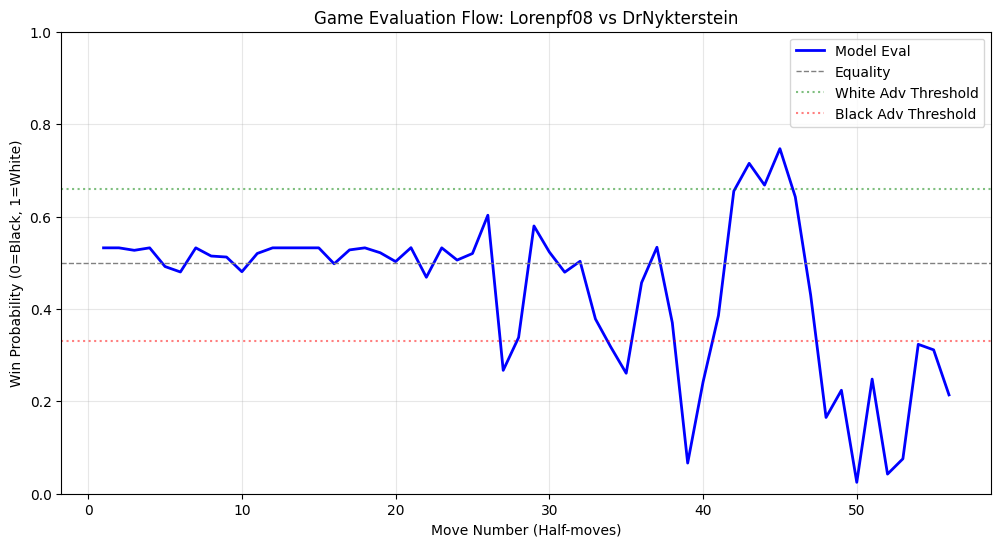

In [31]:
import matplotlib.pyplot as plt

def evaluate_game(moves_str):
    """
    Evaluates an entire chess game move by move.
    Args:
        moves_str (str): A space-separated string of moves (Standard Algebraic Notation).
    Returns:
        np.array: A list of evaluation scores (0 to 1) for each move in the game.
    """
    board = chess.Board()
    moves = moves_str.split()
    board_states = []

    # 1. Simulate the game and collect board states
    for move in moves:
        try:
            board.push_san(move)
            matrix = board_to_matrix(board)
            board_states.append(matrix)
        except ValueError:
            print(f"Stopping at invalid move: {move}")
            break

    if not board_states:
        return np.array([])

    # 2. Batch prediction for efficiency
    # Instead of predicting one by one, we stack them and predict all at once
    X_batch = np.array(board_states)
    scores = model.predict(X_batch, verbose=0)

    return scores.flatten()

# --- Usage Example ---

# Select a sample game from the test set
sample_game_data = test_games[0]
sample_moves = sample_game_data.get('moves', '')
white_player = sample_game_data['players']['white']['user']['name']
black_player = sample_game_data['players']['black']['user']['name']
winner = sample_game_data.get('winner', 'draw')

print(f"Analyzing game: {white_player} vs {black_player} (Winner: {winner})")

# Get evaluations
evals = evaluate_game(sample_moves)

# Plot the evaluation curve
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(evals) + 1), evals, color='blue', linewidth=2, label='Model Eval')

# Add reference lines
plt.axhline(0.5, color='gray', linestyle='--', linewidth=1, label='Equality')
plt.axhline(0.66, color='green', linestyle=':', alpha=0.5, label='White Adv Threshold')
plt.axhline(0.33, color='red', linestyle=':', alpha=0.5, label='Black Adv Threshold')

plt.title(f"Game Evaluation Flow: {white_player} vs {black_player}")
plt.xlabel("Move Number (Half-moves)")
plt.ylabel("Win Probability (0=Black, 1=White)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, 1)
plt.show()

In [32]:
# #engine distilation rather than outcome regression (alpha zero early method vs stockfish eval)
# from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, Add, Flatten, Dense, Dropout
# from tensorflow.keras.models import Model

# def residual_block(x, filters):
#     """
#     Standard Residual Block: Conv -> BN -> ReLU -> Conv -> BN -> Add -> ReLU
#     """
#     shortcut = x

#     # First convolution layer
#     x = Conv2D(filters, (3, 3), padding='same')(x)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)

#     # Second convolution layer
#     x = Conv2D(filters, (3, 3), padding='same')(x)
#     x = BatchNormalization()(x)

#     # Add the shortcut (residual connection)
#     x = Add()([x, shortcut])
#     # Final activation after addition
#     x = Activation('relu')(x)

#     return x

# # Define the model architecture
# input_shape = (8, 8, 12)
# inputs = Input(shape=input_shape)

# # Initial Convolutional Layer
# x = Conv2D(64, (3, 3), padding='same')(inputs)
# x = BatchNormalization()(x)
# x = Activation('relu')(x)

# # Chain 4 Residual Blocks
# # Keeping filters constant at 64 to match the initial layer output
# for _ in range(4):
#     x = residual_block(x, 64)

# # Flatten and Output Head
# x = Flatten()(x)
# x = Dense(64, activation='relu')(x)
# x = Dropout(0.3)(x)
# outputs = Dense(1, activation='sigmoid')(x)

# # Create the Model instance
# resnet_model = Model(inputs=inputs, outputs=outputs, name="Chess_ResNet")

# # Compile the model
# resnet_model.compile(optimizer='adam',
#                      loss='mean_squared_error',
#                      metrics=['mae'])

# # Display model summary
# resnet_model.summary()

In [33]:
# print("Starting training of ResNet model...")
# history_resnet = resnet_model.fit(X_train, y_train,
#                                   epochs=10,
#                                   batch_size=2048,
#                                   validation_data=(X_val, y_val))

# # Plotting the history
# import matplotlib.pyplot as plt

# plt.figure(figsize=(12, 4))

# plt.subplot(1, 2, 1)
# plt.plot(history_resnet.history['loss'], label='Train Loss')
# plt.plot(history_resnet.history['val_loss'], label='Val Loss')
# plt.title('Model Loss (MSE)')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()

# plt.subplot(1, 2, 2)
# plt.plot(history_resnet.history['mae'], label='Train MAE')
# plt.plot(history_resnet.history['val_mae'], label='Val MAE')
# plt.title('Model MAE')
# plt.xlabel('Epoch')
# plt.ylabel('MAE')
# plt.legend()

# plt.tight_layout()
# plt.show()

In [34]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, Add, Flatten, Dense, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.optimizers import Adam
import os

# Define model save path
model_save_path = '/content/drive/MyDrive/chess_resnet_model.h5'

# Check if the model already exists
if os.path.exists(model_save_path):
    print(f"Loading existing model from {model_save_path}")
    resnet_model = load_model(model_save_path)
    # Make sure to compile the loaded model if it was not saved with optimizer state (though it usually is for .h5)
    # or if you want to change optimizer/loss/metrics
    resnet_model.compile(optimizer=Adam(learning_rate=0.0001),
                         loss='mean_squared_error',
                         metrics=['mae'])
    print("Model loaded successfully.")
else:
    print("Model not found. Building and training a new model...")
    # 1. Cast data to float32 for stability with BatchNormalization
    X_train = X_train.astype('float32')
    X_val = X_val.astype('float32')

    def residual_block(x, filters):
        shortcut = x

        # Use He Normal initialization which is better for ReLU
        x = Conv2D(filters, (3, 3), padding='same', kernel_initializer='he_normal')(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)

        x = Conv2D(filters, (3, 3), padding='same', kernel_initializer='he_normal')(x)
        x = BatchNormalization()(x)

        x = Add()([x, shortcut])
        x = Activation('relu')(x)
        return x

    # Define the model architecture
    inputs = Input(shape=(8, 8, 12))

    # Initial Conv Layer
    x = Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # ResNet Blocks
    for _ in range(4):
        x = residual_block(x, 64)

    # Output Head
    x = Flatten()(x)
    x = Dense(64, activation='relu', kernel_initializer='he_normal')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    resnet_model = Model(inputs=inputs, outputs=outputs, name="Chess_ResNet_Fixed")

    # 2. Compile with a lower learning rate
    resnet_model.compile(optimizer=Adam(learning_rate=0.0001),
                         loss='mean_squared_error',
                         metrics=['mae'])

    resnet_model.summary()

    print("Starting training with fixed hyperparameters...")
    history_resnet = resnet_model.fit(X_train, y_train,
                                      epochs=10,
                                      batch_size=2048,
                                      validation_data=(X_val, y_val))

    # Save the trained model
    resnet_model.save(model_save_path)
    print(f"Model saved to {model_save_path}")

# If model was loaded, history_resnet won't exist. This assumes you might want to plot history only if trained.
# If you loaded the model, you might want to evaluate it instead of plotting training history.

Loading existing model from /content/drive/MyDrive/chess_resnet_model.h5


Model loaded successfully.


NameError: name 'history_resnet' is not defined

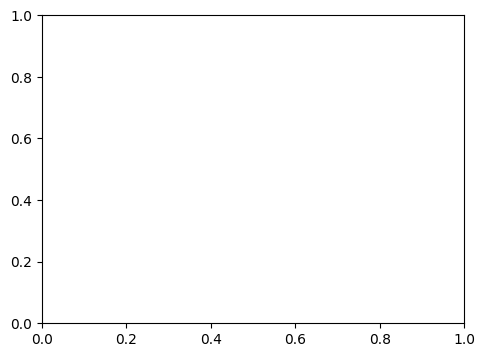

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_resnet.history['loss'], label='Train Loss')
plt.plot(history_resnet.history['val_loss'], label='Val Loss')
plt.title('Fixed ResNet Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_resnet.history['mae'], label='Train MAE')
plt.plot(history_resnet.history['val_mae'], label='Val MAE')
plt.title('Fixed ResNet MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [36]:
import chess
import numpy as np

# 1. Choose a specific chess board position (FEN string)
# Using the starting position as an example
fen_string = chess.STARTING_FEN
# Alternatively, you could use a mid-game FEN:
# fen_string = "rnbqkb1r/pp2pppp/3p1n2/8/3QP3/2N5/PPP2PPP/R1B1KBNR w KQkq - 0 4"

print(f"Selected FEN: {fen_string}")

# 2. Convert this FEN string into a chess.Board object
board = chess.Board(fen_string)
print("Board created from FEN:")
print(board)

# 3. Transform the chess.Board object into the 8x8x12 NumPy array format
# The board_to_matrix function was defined previously
matrix_input = board_to_matrix(board)

print(f"Matrix shape after conversion: {matrix_input.shape}")
print(f"Sample data from matrix (top-left corner):\n{matrix_input[0, 0, :]}")

# 4. Add an extra dimension to create a batch of size 1
model_input = np.expand_dims(matrix_input, axis=0)

print(f"Final model input shape: {model_input.shape}")
print("Board position successfully prepared for model input.")

Selected FEN: rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1
Board created from FEN:
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R
Matrix shape after conversion: (8, 8, 12)
Sample data from matrix (top-left corner):
[0 0 0 0 0 0 0 0 0 1 0 0]
Final model input shape: (1, 8, 8, 12)
Board position successfully prepared for model input.


Generating saliency map for Starting Position: rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1


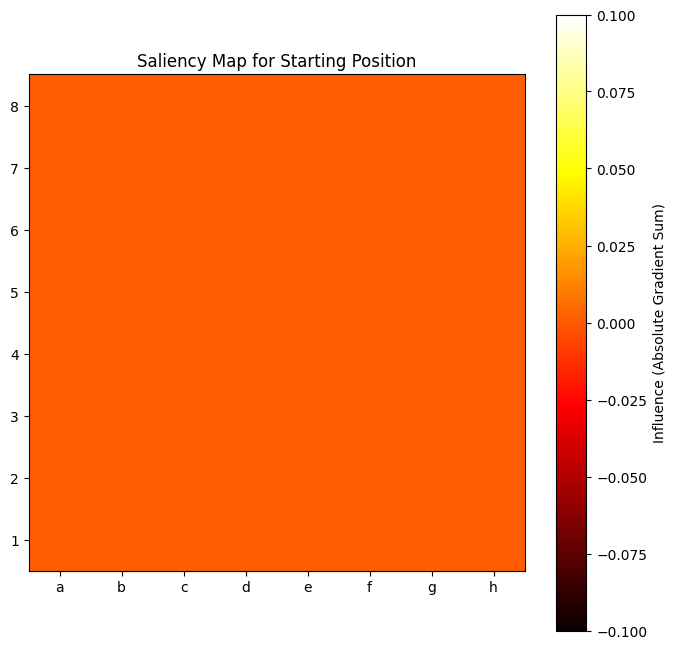


Generating saliency map for Mid-Game Position: r1b1q1k1/pp2np1p/2nQ1pp1/8/8/2N2N2/PP2PPPP/R3KB1R w KQ - 3 17


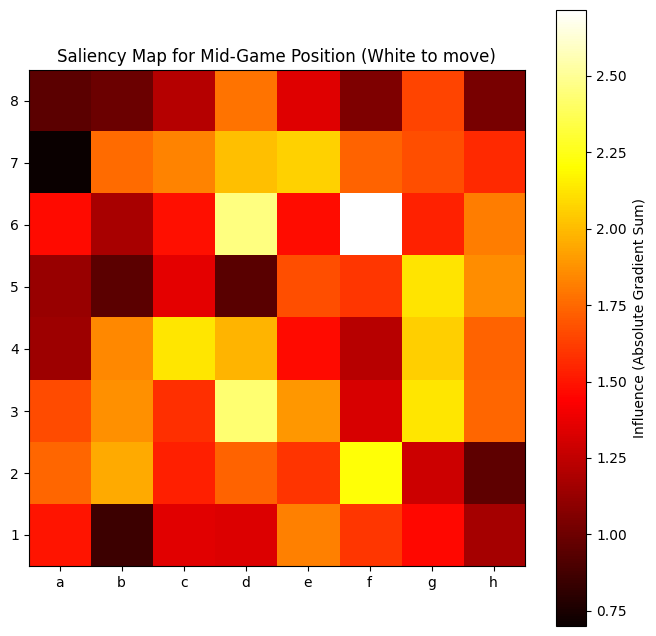


Generating saliency map for Position with Check: 1kr3r1/2p4Q/p1p1P3/6p1/1PNn4/P5qP/6P1/4R1K1 b - - 0 32


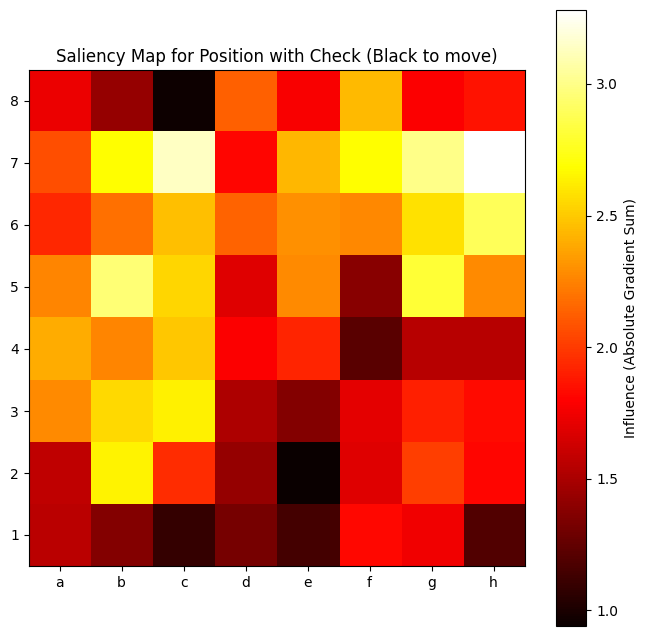

In [37]:
import chess
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def generate_saliency_map(fen, model):
    """
    Generates a saliency map for a given FEN string using the provided model.
    Returns an 8x8 numpy array where higher values indicate more influence.
    """
    board = chess.Board(fen)
    matrix = board_to_matrix(board)

    # Convert to TensorFlow tensor and add batch dimension, ensuring float32
    input_tensor = tf.convert_to_tensor(np.expand_dims(matrix, axis=0), dtype=tf.float32)

    with tf.GradientTape() as tape:
        tape.watch(input_tensor)
        prediction = model(input_tensor)

    # Calculate gradients of the prediction with respect to the input
    gradients = tape.gradient(prediction, input_tensor)

    # Aggregate gradients across the 12 channels for each 8x8 square
    # We take the absolute value to get the magnitude of influence
    saliency_map = np.sum(np.abs(gradients[0]), axis=-1)

    return saliency_map

def plot_saliency_map(saliency_map, title="Saliency Map"):
    """
    Plots an 8x8 saliency map as a heatmap.
    """
    plt.figure(figsize=(8, 8))
    plt.imshow(saliency_map, cmap='hot', interpolation='nearest', origin='upper')
    plt.colorbar(label='Influence (Absolute Gradient Sum)')
    plt.title(title)
    plt.xticks(np.arange(8), ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
    plt.yticks(np.arange(8), [str(i) for i in range(8, 0, -1)])
    plt.grid(False)
    plt.show()

# --- Demonstration ---

# 1. Starting Position
start_fen = chess.STARTING_FEN
print(f"Generating saliency map for Starting Position: {start_fen}")
start_saliency = generate_saliency_map(start_fen, resnet_model)
plot_saliency_map(start_saliency, title="Saliency Map for Starting Position")

# 2. An arbitrary mid-game position (White to move, threatening mate)
# From Lichess game: https://lichess.org/L92D8uK2/black#32
mid_game_fen = "r1b1q1k1/pp2np1p/2nQ1pp1/8/8/2N2N2/PP2PPPP/R3KB1R w KQ - 3 17"
print(f"\nGenerating saliency map for Mid-Game Position: {mid_game_fen}")
mid_game_saliency = generate_saliency_map(mid_game_fen, resnet_model)
plot_saliency_map(mid_game_saliency, title="Saliency Map for Mid-Game Position (White to move)")

# 3. Another arbitrary mid-game position (Black to move, in check)
# From Lichess game: https://lichess.org/L92D8uK2/black#32
check_fen = "r1b1q1k1/pp2np1p/2nQ1pp1/8/8/2N2N2/PP2PPPP/R3KB1R w KQ - 3 17"
check_fen = "1kr3r1/2p4Q/p1p1P3/6p1/1PNn4/P5qP/6P1/4R1K1 b - - 0 32" # Example of a position where Black is in check
print(f"\nGenerating saliency map for Position with Check: {check_fen}")
check_saliency = generate_saliency_map(check_fen, resnet_model)
plot_saliency_map(check_saliency, title="Saliency Map for Position with Check (Black to move)")

Visualizing White Knight influence...


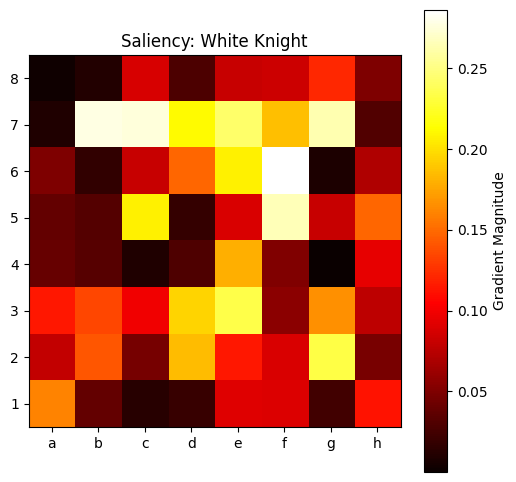

Visualizing Black Queen influence...


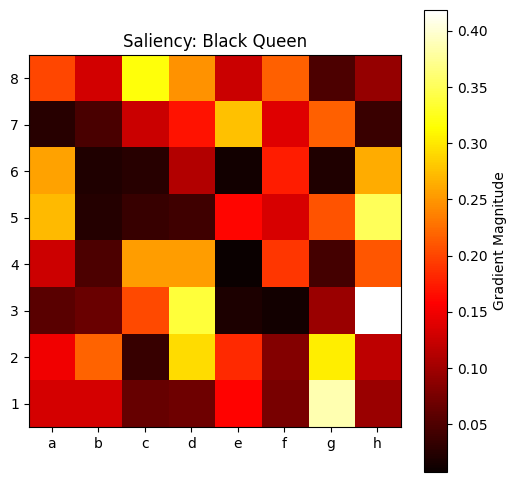

In [38]:
import chess
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def get_piece_saliency_map(model, fen, piece_symbol):
    """
    Computes the saliency map for a specific piece type (channel).
    piece_symbol: 'P', 'N', 'B', 'R', 'Q', 'K' (White) or 'p', 'n', 'b', 'r', 'q', 'k' (Black)
    """
    # Map symbols to channel indices (0-5 for White, 6-11 for Black)
    symbol_to_channel = {
        'P': 0, 'N': 1, 'B': 2, 'R': 3, 'Q': 4, 'K': 5,
        'p': 6, 'n': 7, 'b': 8, 'r': 9, 'q': 10, 'k': 11
    }

    if piece_symbol not in symbol_to_channel:
        raise ValueError(f"Invalid piece symbol: {piece_symbol}")

    target_channel = symbol_to_channel[piece_symbol]

    # Handle input (FEN string or chess.Board)
    if isinstance(fen, str):
        board = chess.Board(fen)
    else:
        board = fen

    # Convert to matrix and tensor using the existing board_to_matrix function
    matrix = board_to_matrix(board)
    input_tensor = tf.convert_to_tensor(np.expand_dims(matrix, axis=0), dtype=tf.float32)

    # Compute Gradients
    with tf.GradientTape() as tape:
        tape.watch(input_tensor)
        prediction = model(input_tensor)

    gradients = tape.gradient(prediction, input_tensor)

    # Extract the specific channel's absolute gradients
    # Shape: (8, 8)
    saliency_map = np.abs(gradients[0, :, :, target_channel])

    return saliency_map

def plot_piece_saliency(model, fen, piece_symbol):
    """
    Plots the saliency map for a specific piece type.
    """
    saliency = get_piece_saliency_map(model, fen, piece_symbol)

    # Setup plot
    plt.figure(figsize=(6, 6))
    plt.imshow(saliency, cmap='hot', interpolation='nearest', origin='upper')

    # Add piece/channel info to title
    piece_name_map = {
        'P': 'White Pawn', 'N': 'White Knight', 'B': 'White Bishop', 'R': 'White Rook', 'Q': 'White Queen', 'K': 'White King',
        'p': 'Black Pawn', 'n': 'Black Knight', 'b': 'Black Bishop', 'r': 'Black Rook', 'q': 'Black Queen', 'k': 'Black King'
    }
    title = f"Saliency: {piece_name_map.get(piece_symbol, piece_symbol)}"
    plt.title(title)
    plt.colorbar(label='Gradient Magnitude')

    # Chess board coordinates
    plt.xticks(np.arange(8), ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
    plt.yticks(np.arange(8), [str(i) for i in range(8, 0, -1)])
    plt.show()

# --- Example Usage ---
# Using the previously defined 'mid_game_fen'
# "r1b1q1k1/pp2np1p/2nQ1pp1/8/8/2N2N2/PP2PPPP/R3KB1R w KQ - 3 17"

# Example 1: White Knight saliency (checking influence of knights in this position)
print("Visualizing White Knight influence...")
plot_piece_saliency(resnet_model, mid_game_fen, 'N')

# Example 2: Black Queen saliency
print("Visualizing Black Queen influence...")
plot_piece_saliency(resnet_model, mid_game_fen, 'q')

Game selected: Lorenpf08 vs DrNykterstein
Analyzing entire game (56 moves)...

Move 1: 1. f4
Model Score: 0.4988 (0=Black Win, 1=White Win)


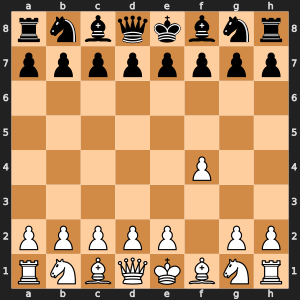

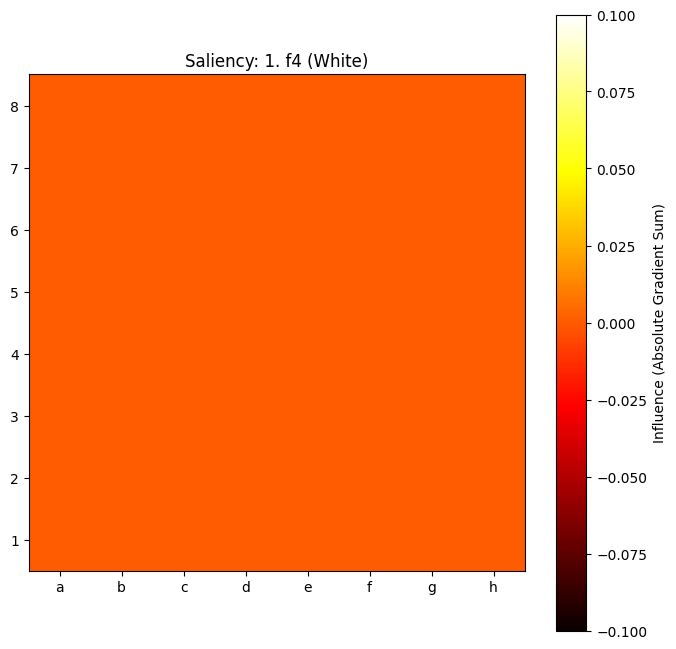


Move 2: 1... g6
Model Score: 0.4988 (0=Black Win, 1=White Win)


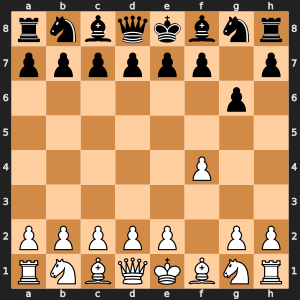

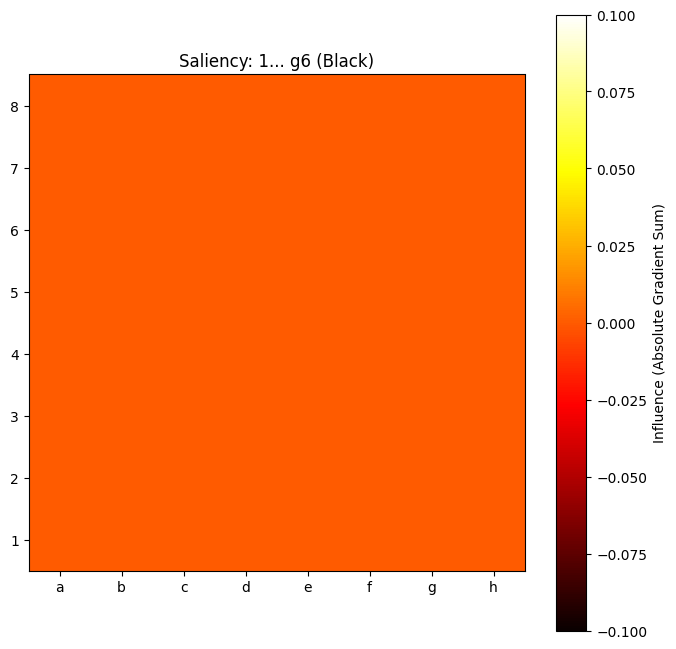


Move 3: 2. Nf3
Model Score: 0.4735 (0=Black Win, 1=White Win)


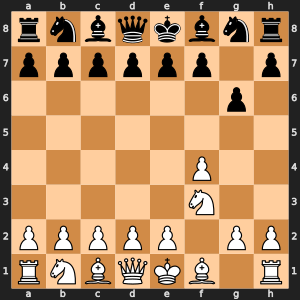

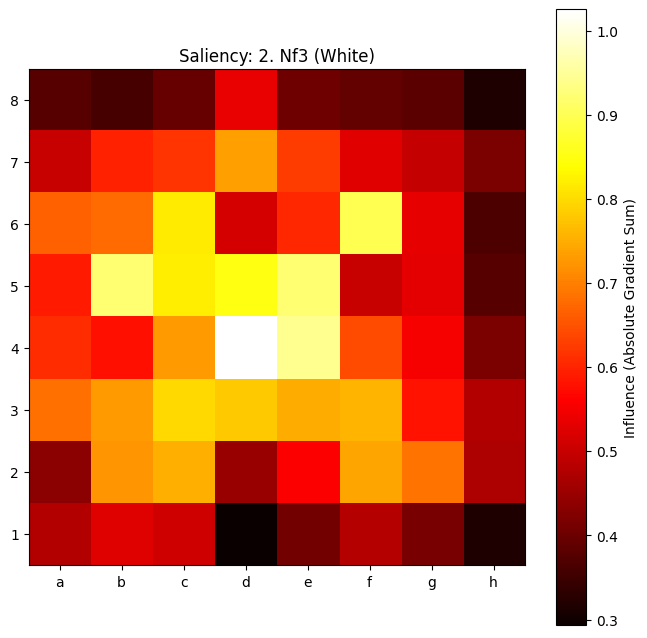


Move 4: 2... Bg7
Model Score: 0.4871 (0=Black Win, 1=White Win)


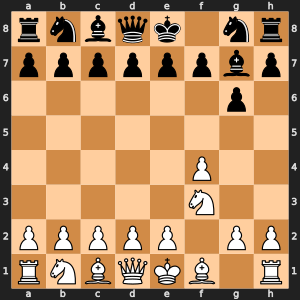

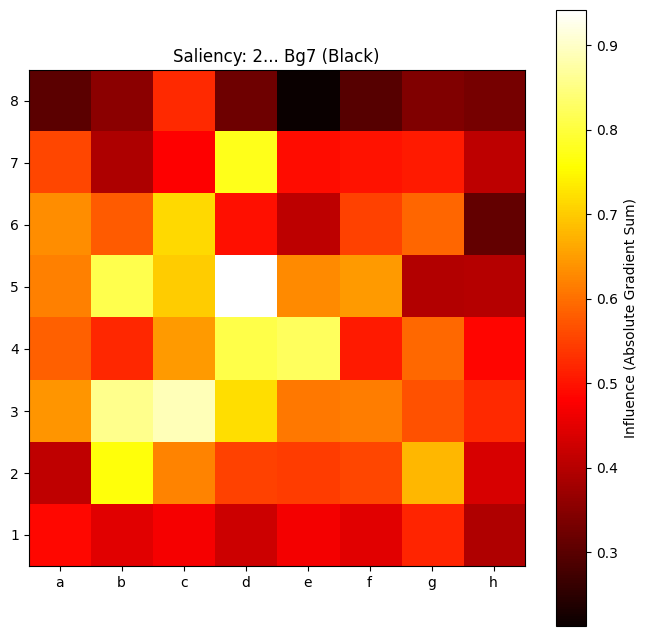


Move 5: 3. g3
Model Score: 0.4988 (0=Black Win, 1=White Win)


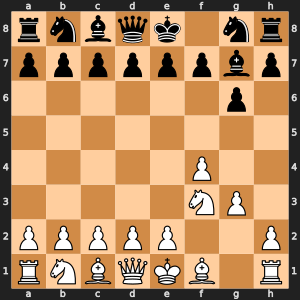

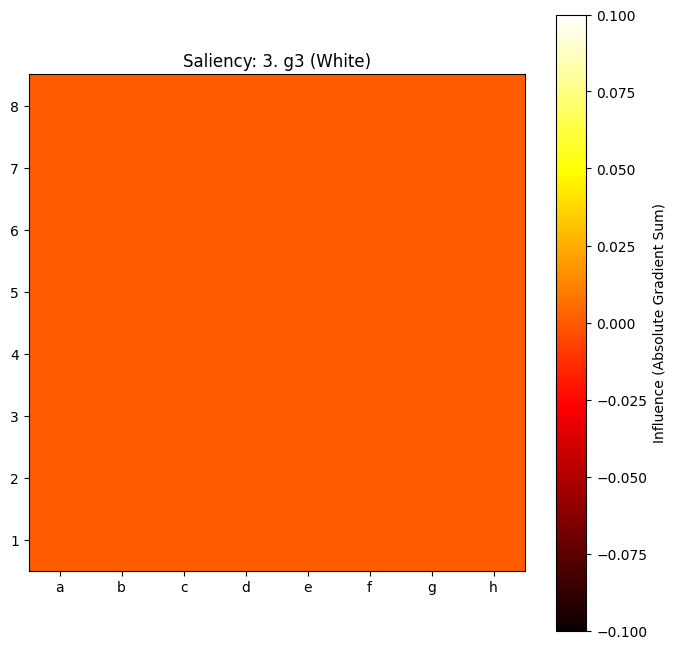


Move 6: 3... d6
Model Score: 0.4941 (0=Black Win, 1=White Win)


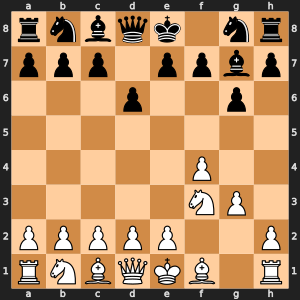

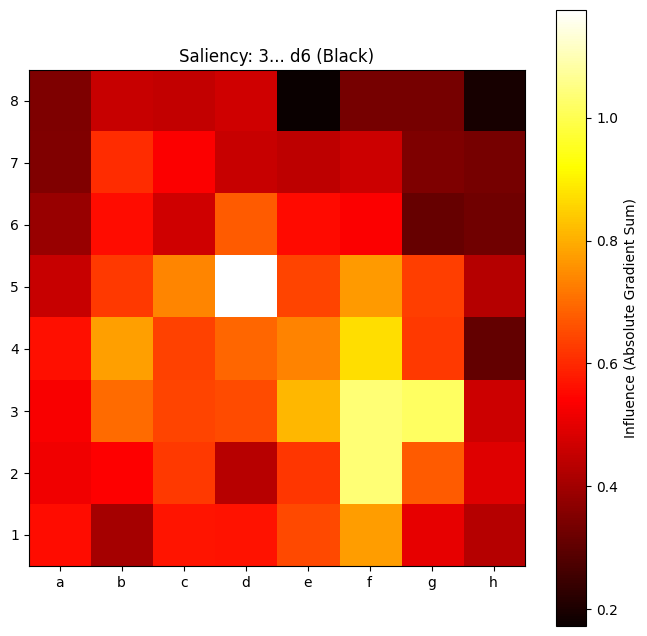


Move 7: 4. Bg2
Model Score: 0.4971 (0=Black Win, 1=White Win)


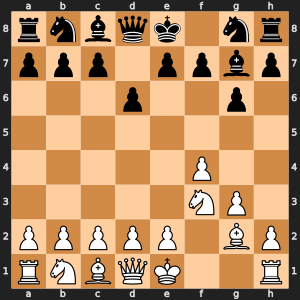

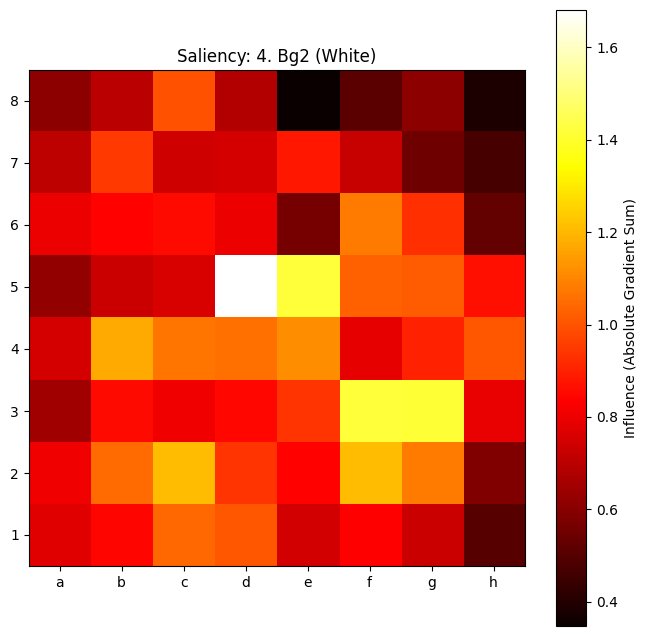


Move 8: 4... Nf6
Model Score: 0.5122 (0=Black Win, 1=White Win)


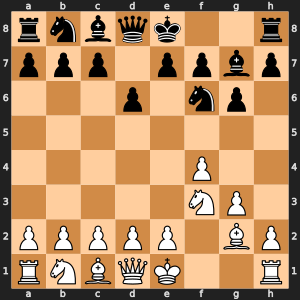

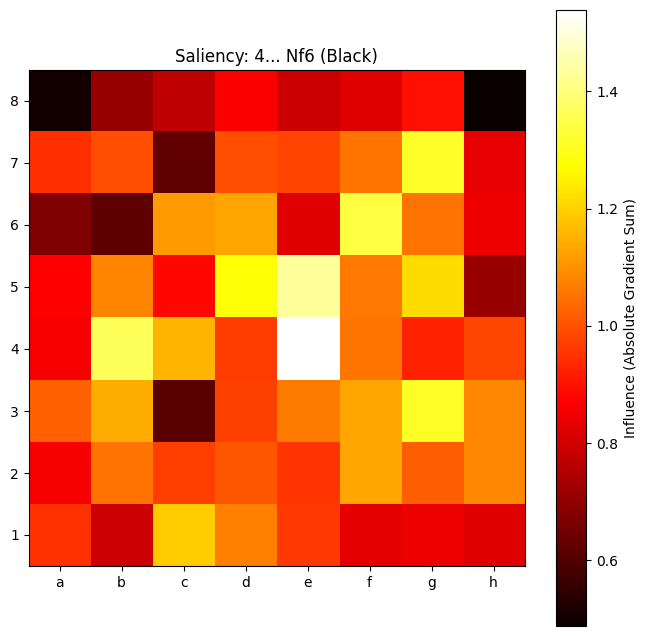


Move 9: 5. O-O
Model Score: 0.4693 (0=Black Win, 1=White Win)


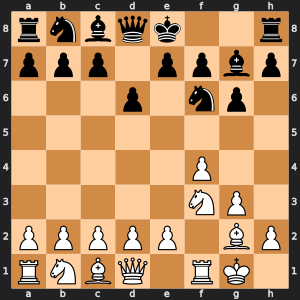

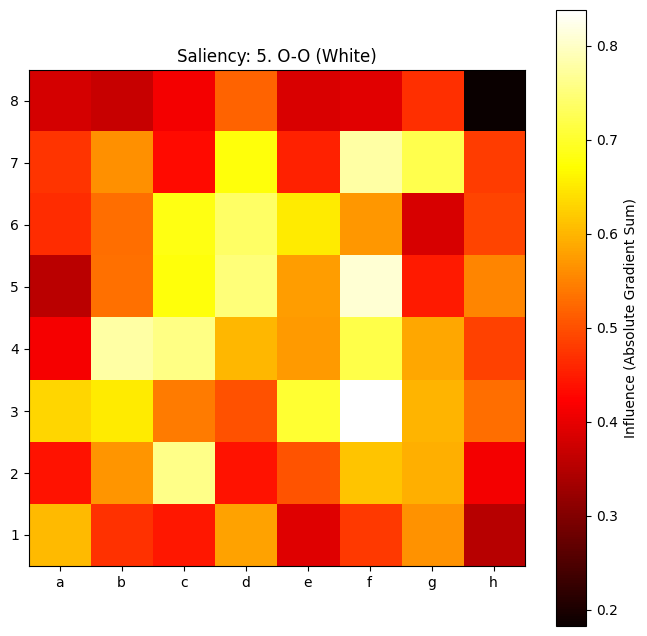


Move 10: 5... O-O
Model Score: 0.4880 (0=Black Win, 1=White Win)


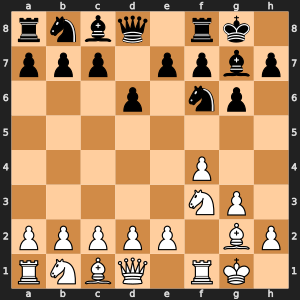

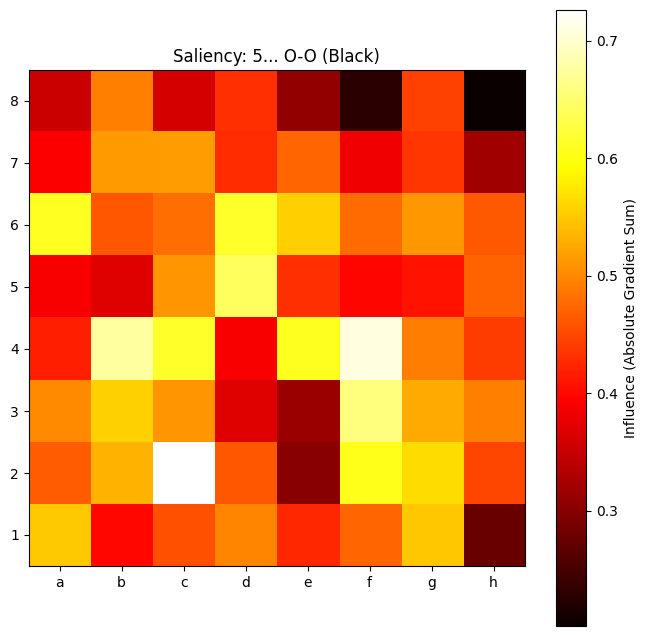


Move 11: 6. d3
Model Score: 0.5325 (0=Black Win, 1=White Win)


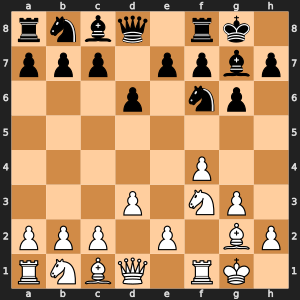

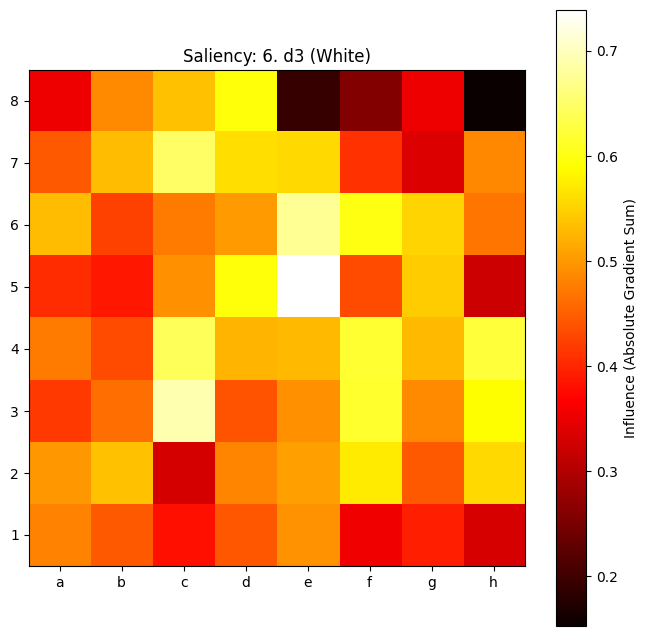


Move 12: 6... c5
Model Score: 0.5483 (0=Black Win, 1=White Win)


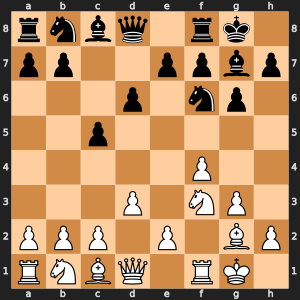

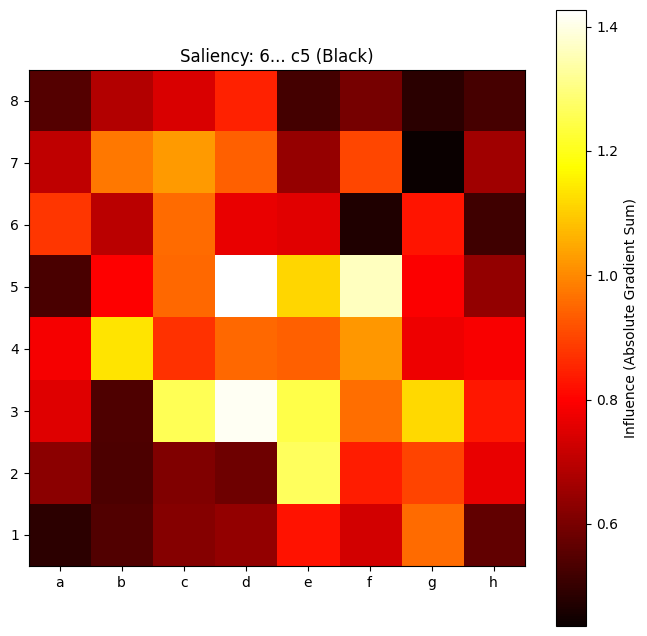


Move 13: 7. e4
Model Score: 0.5115 (0=Black Win, 1=White Win)


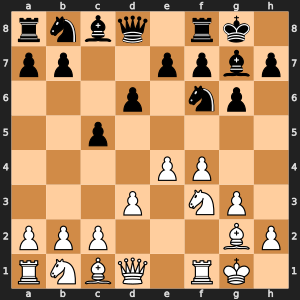

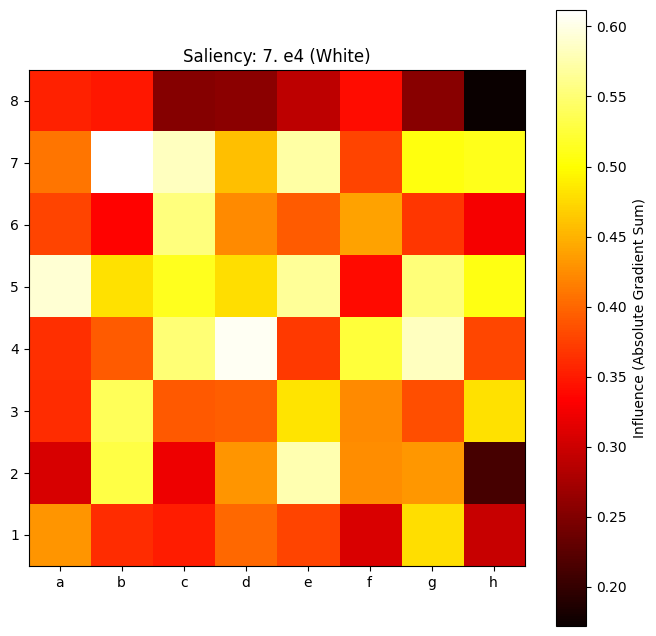


Move 14: 7... Nc6
Model Score: 0.4988 (0=Black Win, 1=White Win)


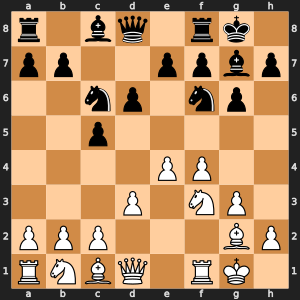

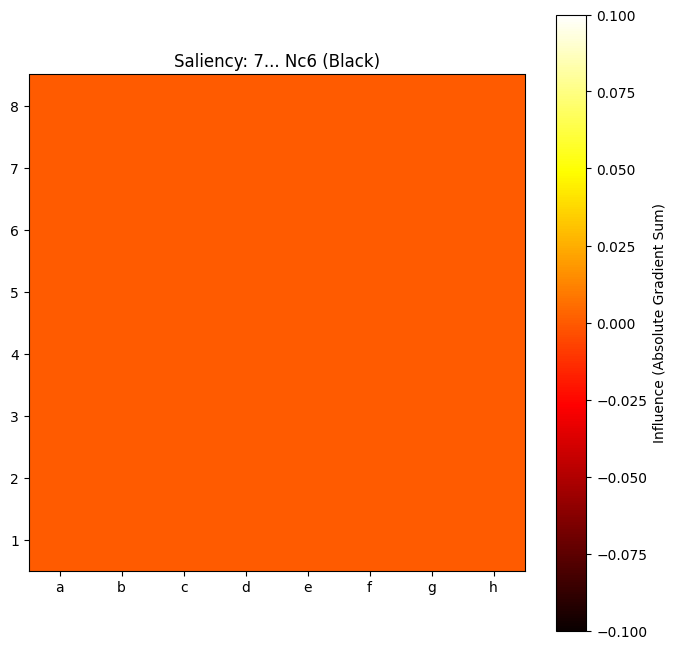


Move 15: 8. Nc3
Model Score: 0.4922 (0=Black Win, 1=White Win)


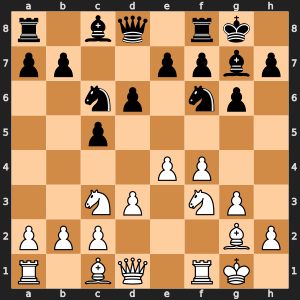

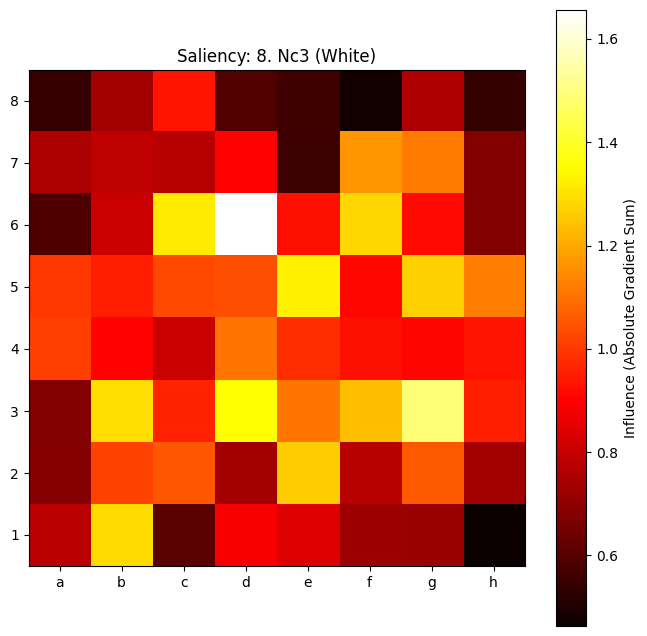


Move 16: 8... e5
Model Score: 0.4360 (0=Black Win, 1=White Win)


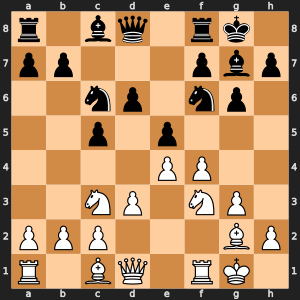

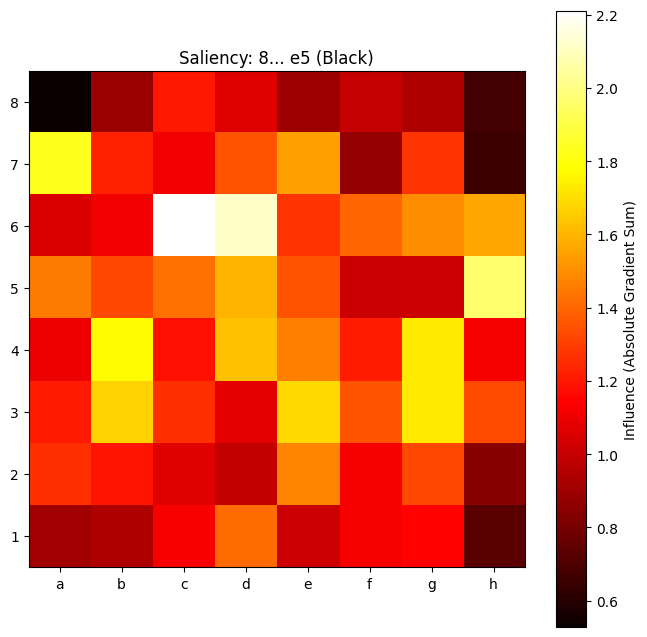


Move 17: 9. h3
Model Score: 0.3353 (0=Black Win, 1=White Win)


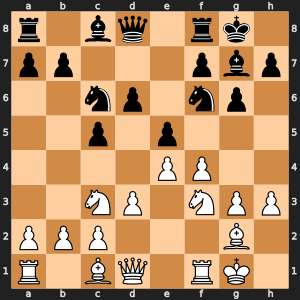

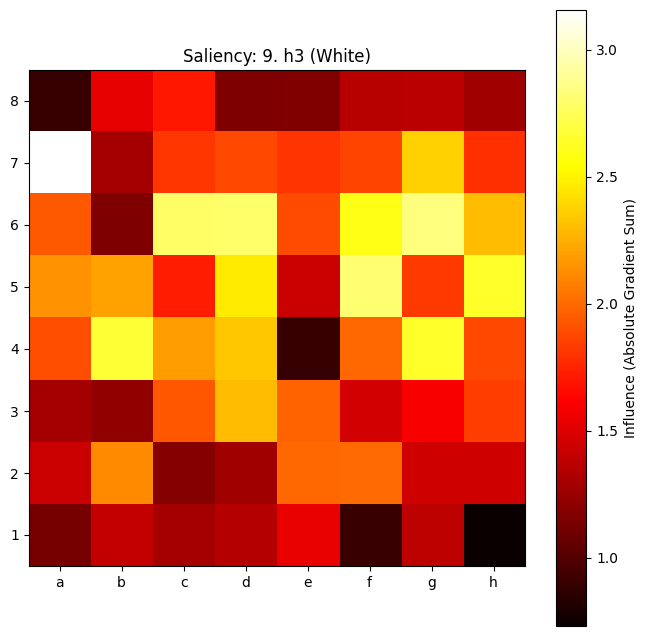


Move 18: 9... exf4
Model Score: 0.3035 (0=Black Win, 1=White Win)


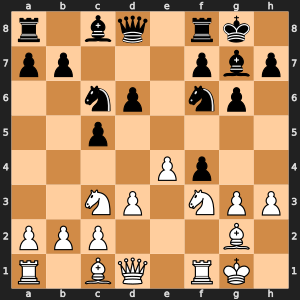

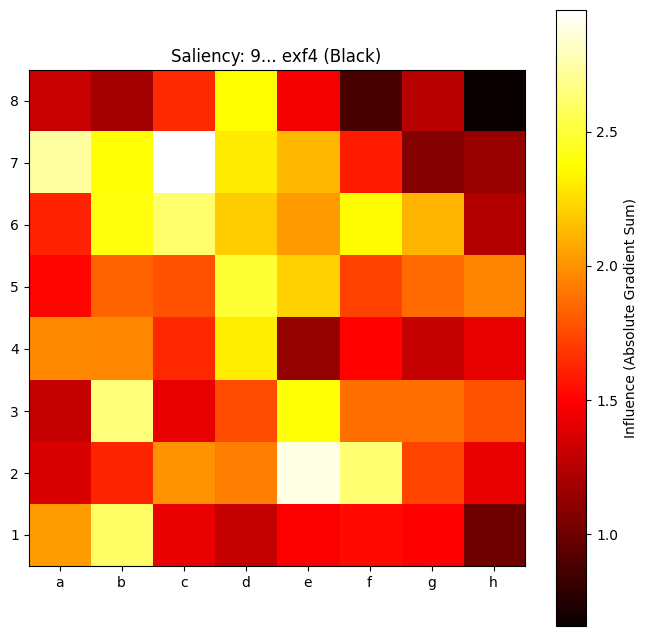


Move 19: 10. Bxf4
Model Score: 0.4988 (0=Black Win, 1=White Win)


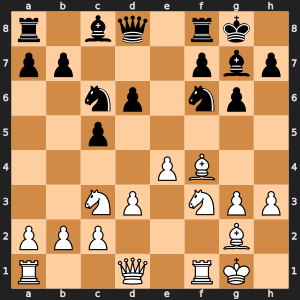

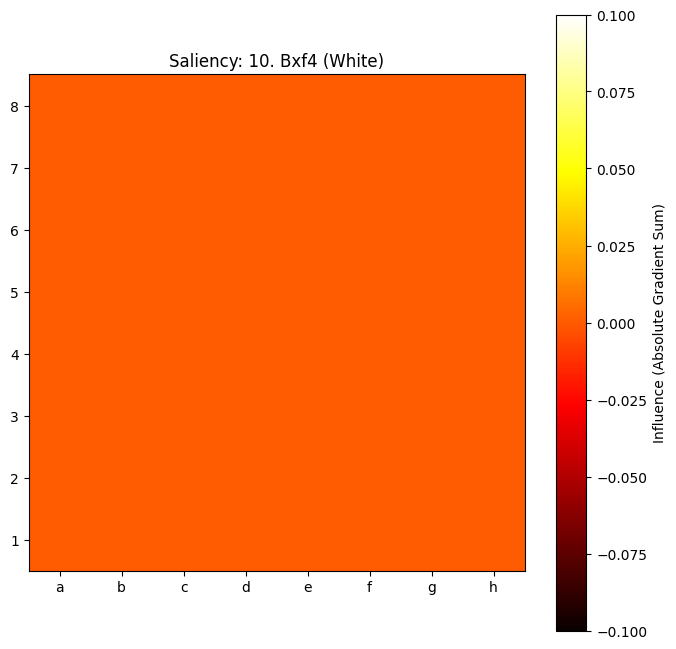


Move 20: 10... Nh5
Model Score: 0.2984 (0=Black Win, 1=White Win)


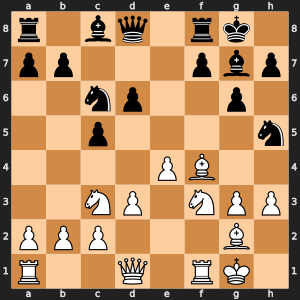

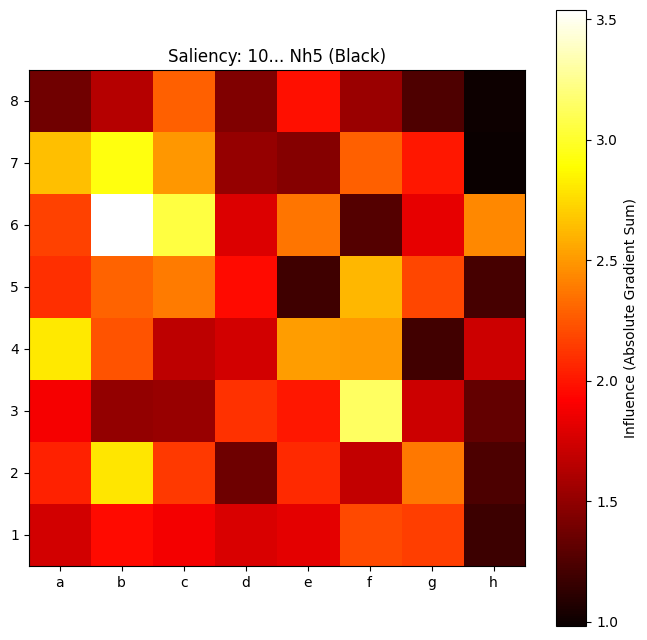


Move 21: 11. Qd2
Model Score: 0.2078 (0=Black Win, 1=White Win)


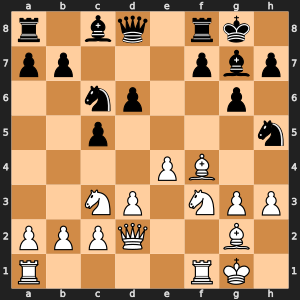

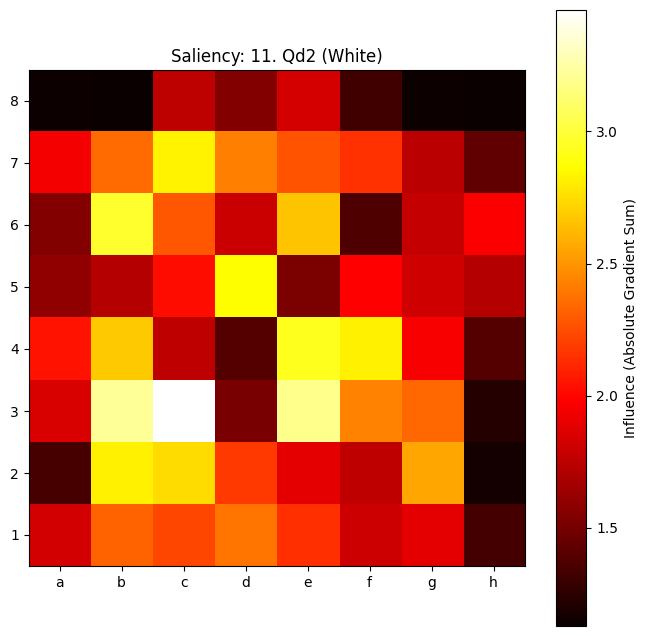


Move 22: 11... Nxf4
Model Score: 0.0948 (0=Black Win, 1=White Win)


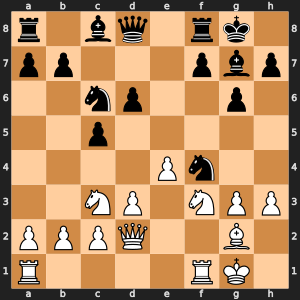

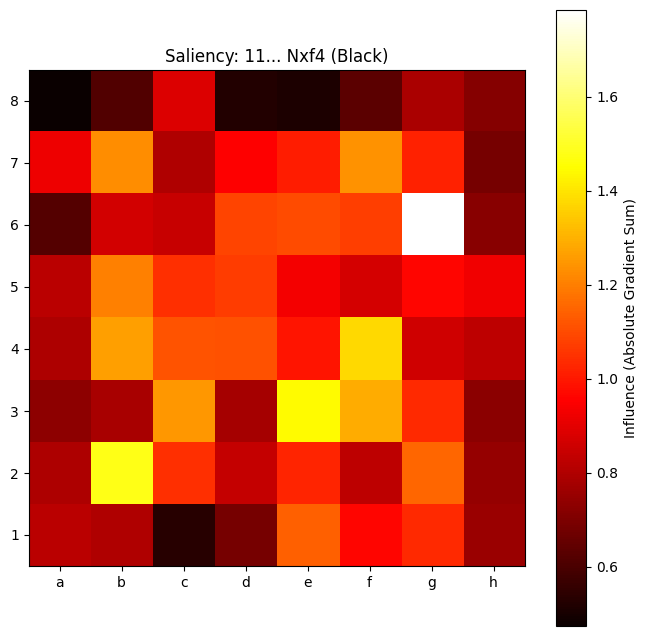


Move 23: 12. gxf4
Model Score: 0.3308 (0=Black Win, 1=White Win)


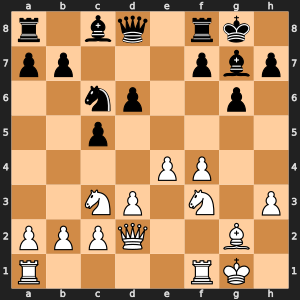

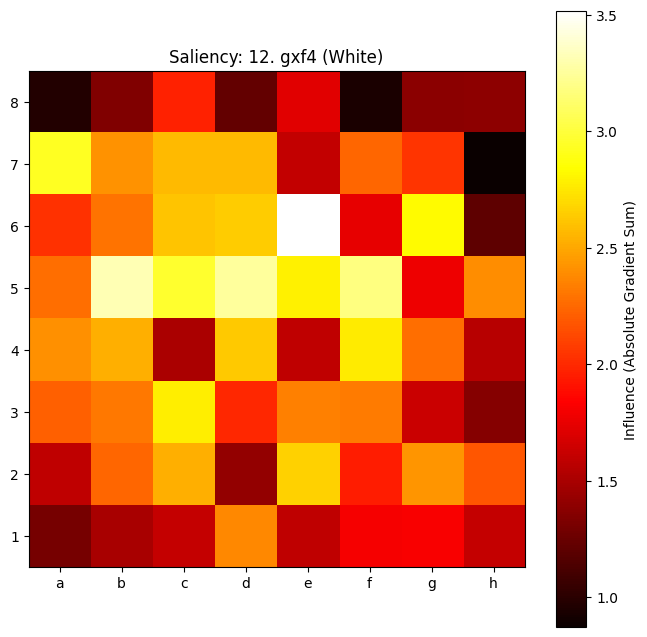


Move 24: 12... f5
Model Score: 0.1311 (0=Black Win, 1=White Win)


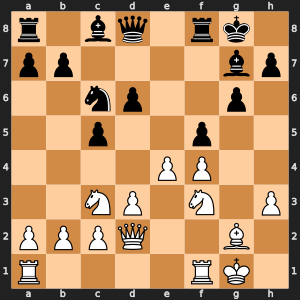

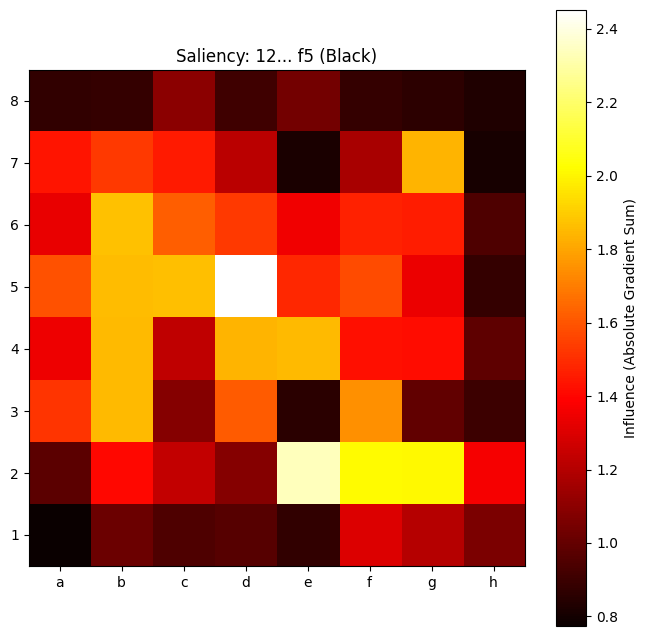


Move 25: 13. Rae1
Model Score: 0.2010 (0=Black Win, 1=White Win)


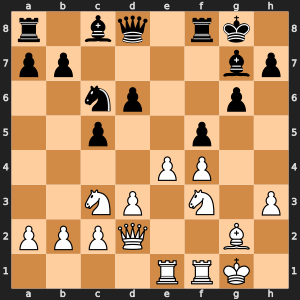

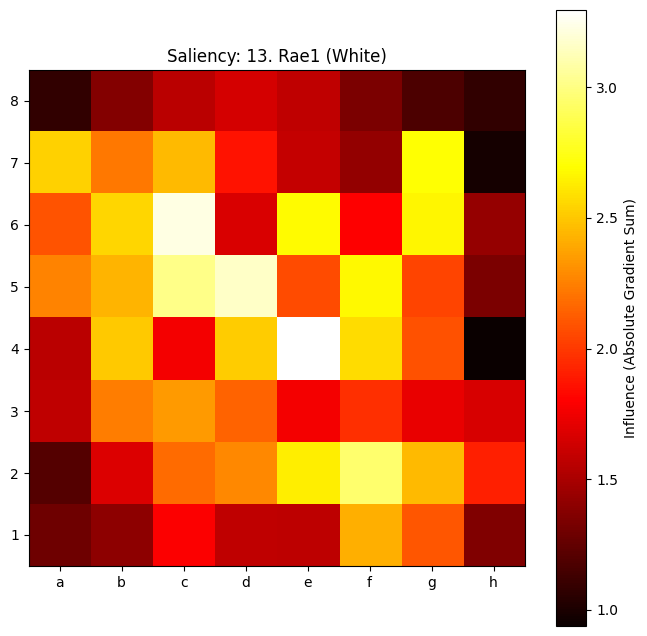


Move 26: 13... Kh8
Model Score: 0.2574 (0=Black Win, 1=White Win)


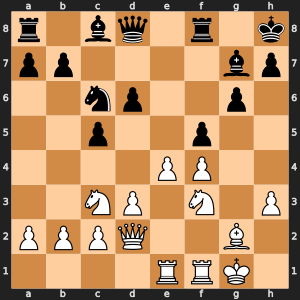

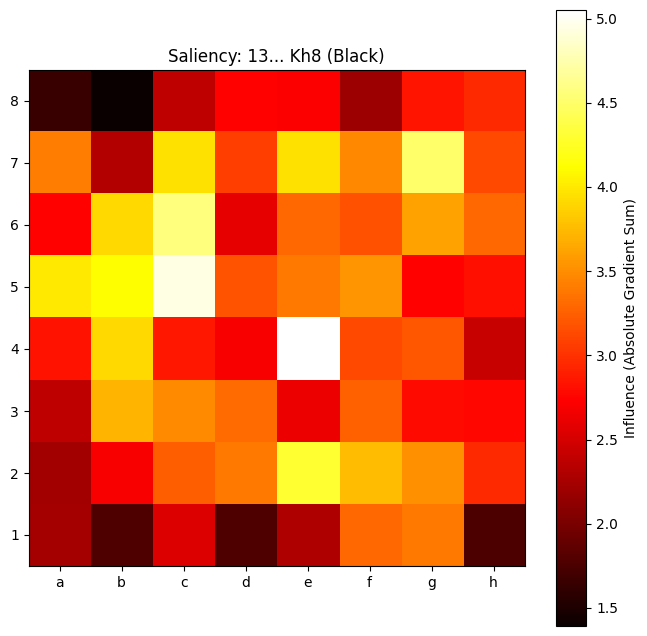


Move 27: 14. Kh2
Model Score: 0.1242 (0=Black Win, 1=White Win)


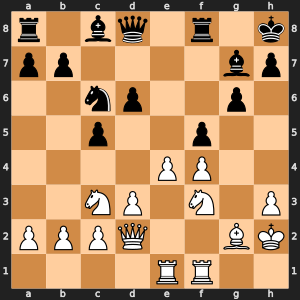

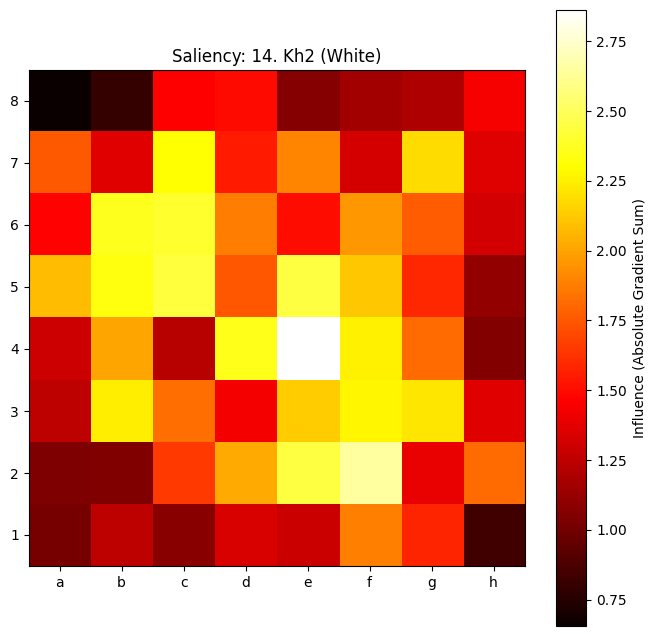


Move 28: 14... Be6
Model Score: 0.4959 (0=Black Win, 1=White Win)


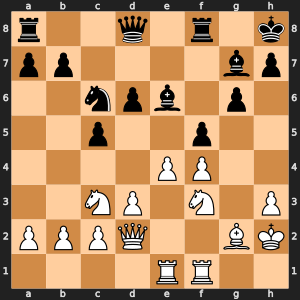

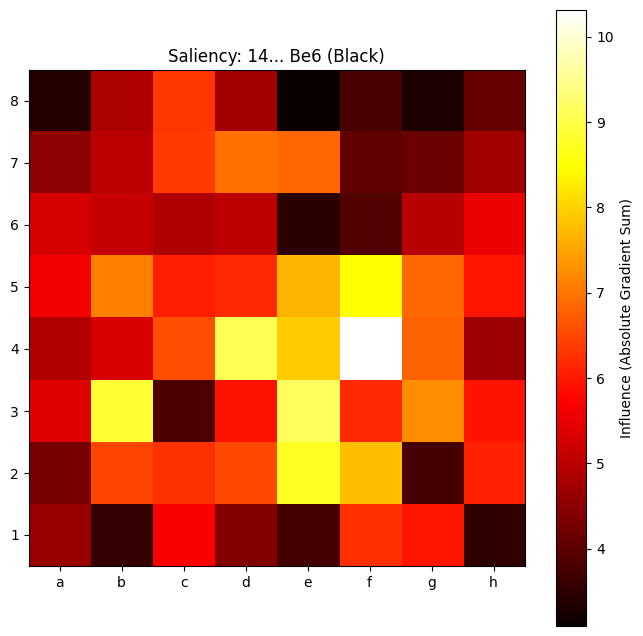


Move 29: 15. Ng5
Model Score: 0.7549 (0=Black Win, 1=White Win)


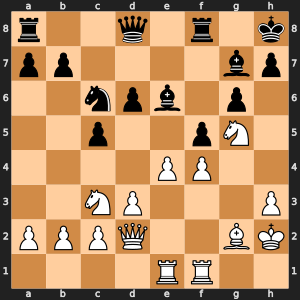

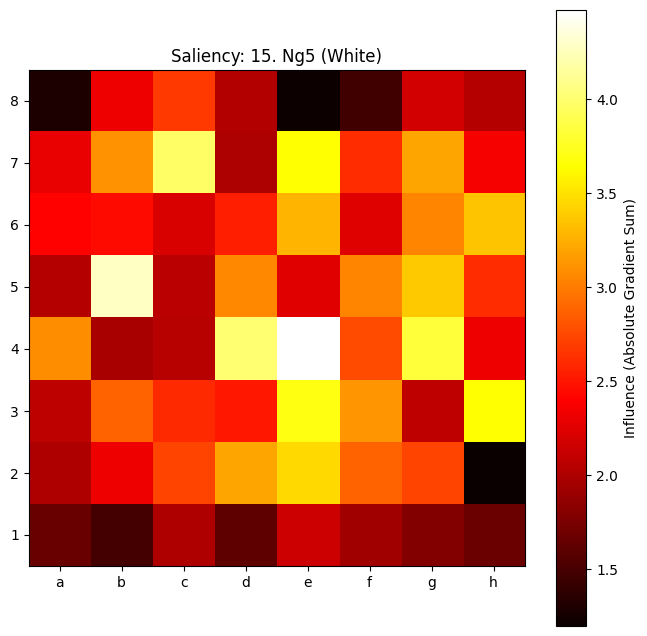


Move 30: 15... Bg8
Model Score: 0.6419 (0=Black Win, 1=White Win)


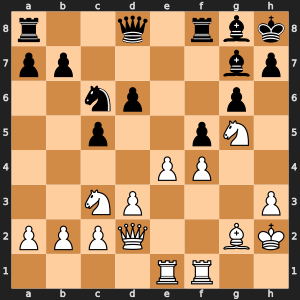

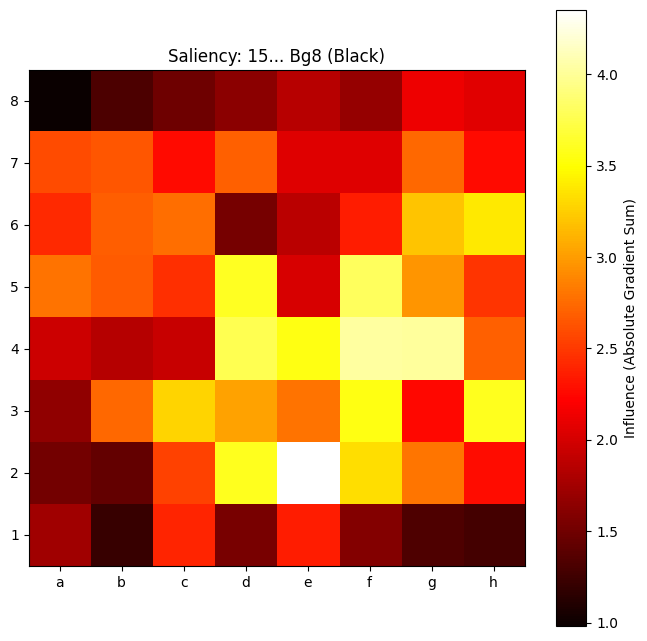


Move 31: 16. h4
Model Score: 0.5184 (0=Black Win, 1=White Win)


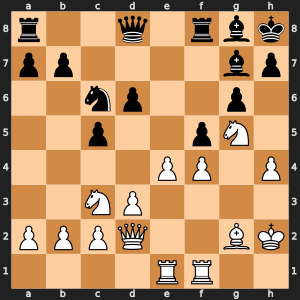

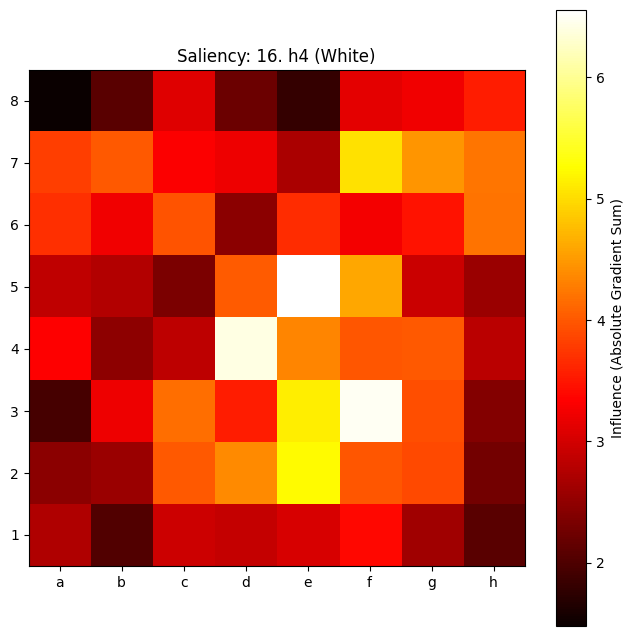


Move 32: 16... Nd4
Model Score: 0.4855 (0=Black Win, 1=White Win)


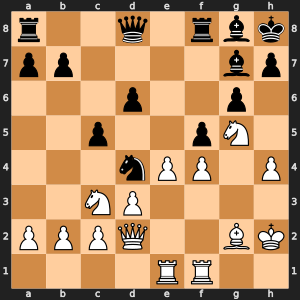

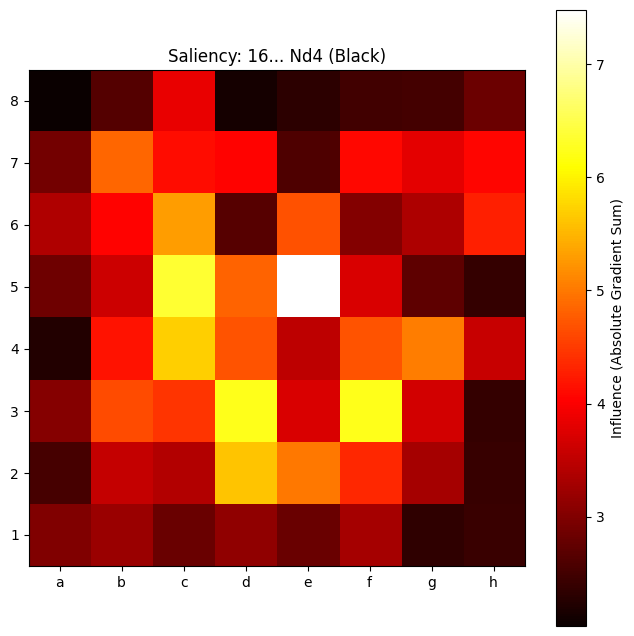


Move 33: 17. Ne2
Model Score: 0.2753 (0=Black Win, 1=White Win)


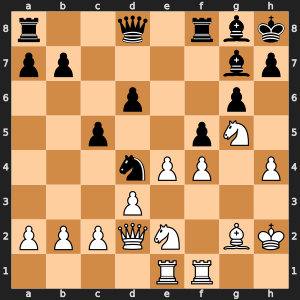

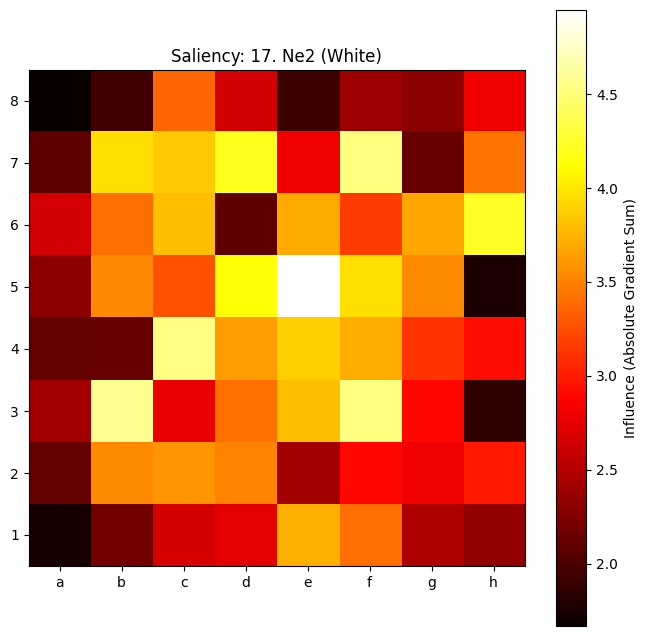


Move 34: 17... h6
Model Score: 0.0141 (0=Black Win, 1=White Win)


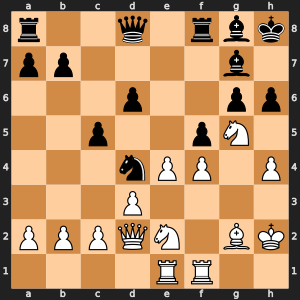

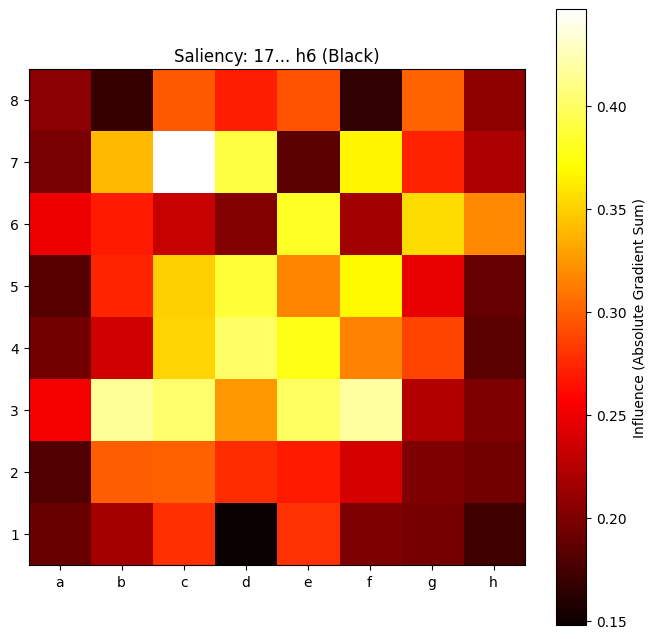


Move 35: 18. Nf3
Model Score: 0.0090 (0=Black Win, 1=White Win)


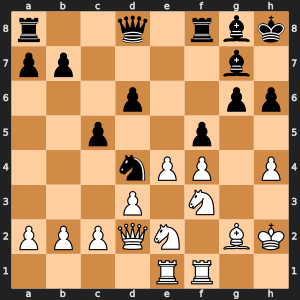

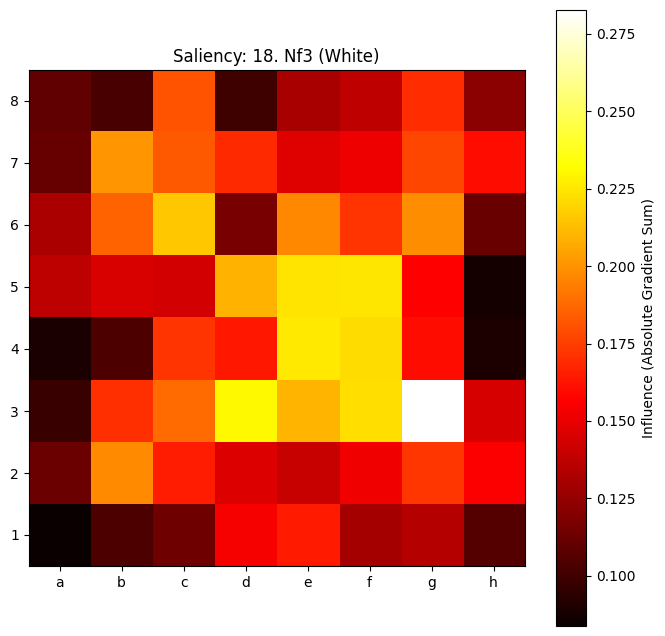


Move 36: 18... Nxf3+
Model Score: 0.0028 (0=Black Win, 1=White Win)


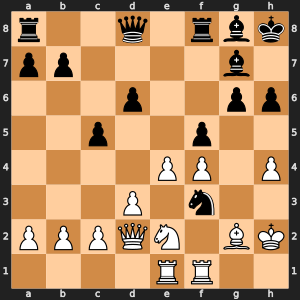

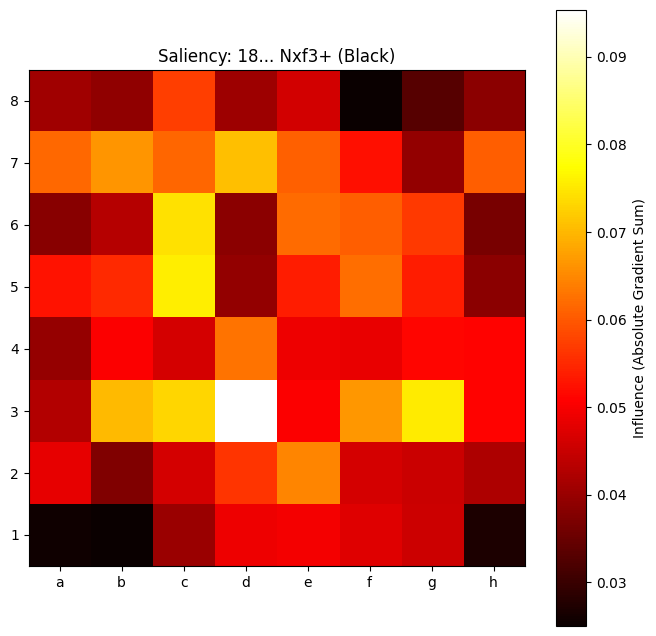


Move 37: 19. Rxf3
Model Score: 0.0279 (0=Black Win, 1=White Win)


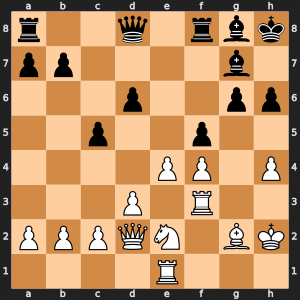

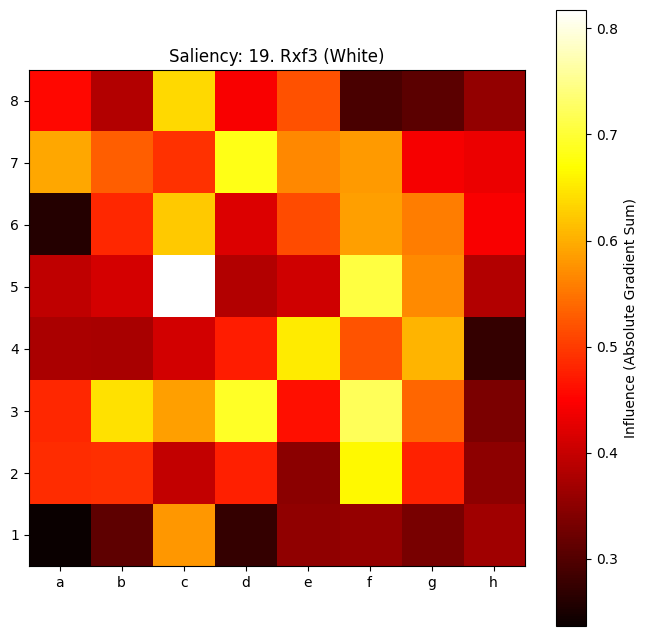


Move 38: 19... Qxh4+
Model Score: 0.0246 (0=Black Win, 1=White Win)


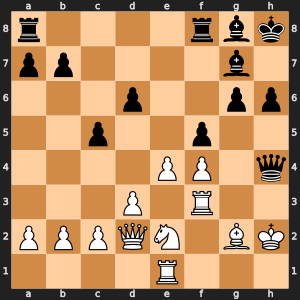

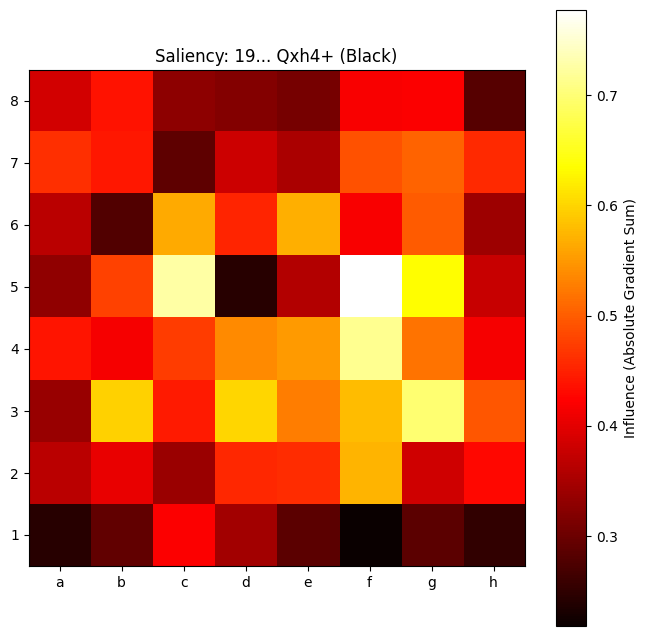


Move 39: 20. Rh3
Model Score: 0.0082 (0=Black Win, 1=White Win)


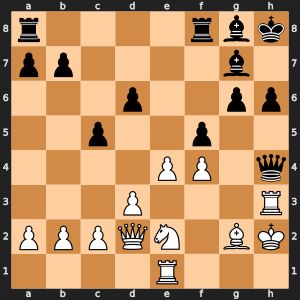

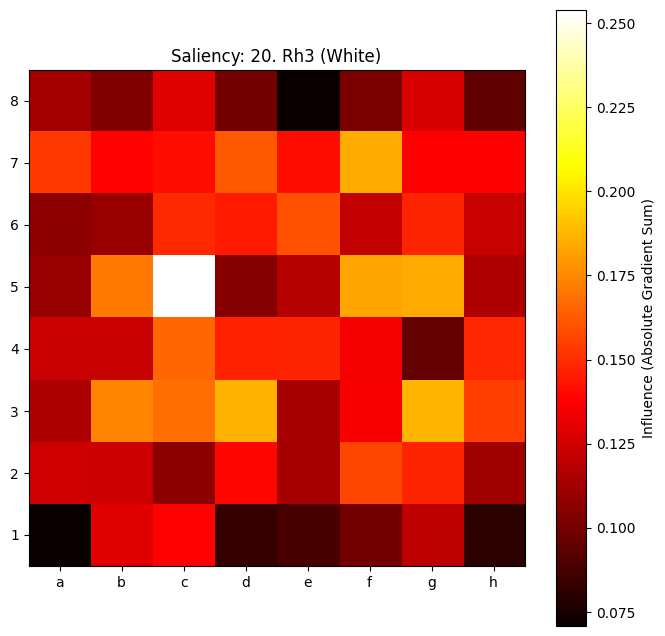


Move 40: 20... Qf6
Model Score: 0.0023 (0=Black Win, 1=White Win)


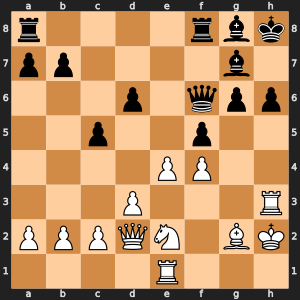

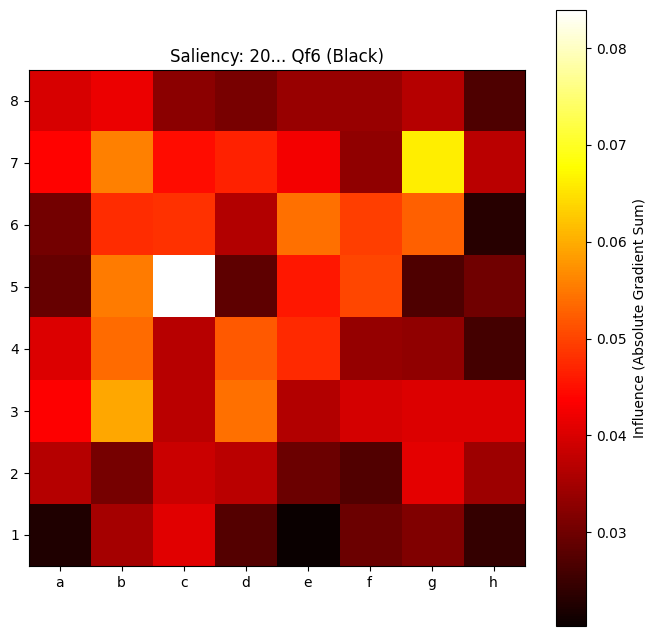


Move 41: 21. Rh1
Model Score: 0.0071 (0=Black Win, 1=White Win)


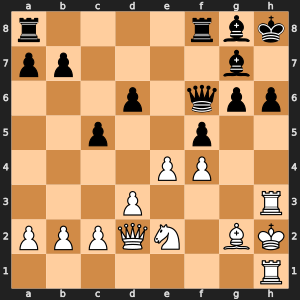

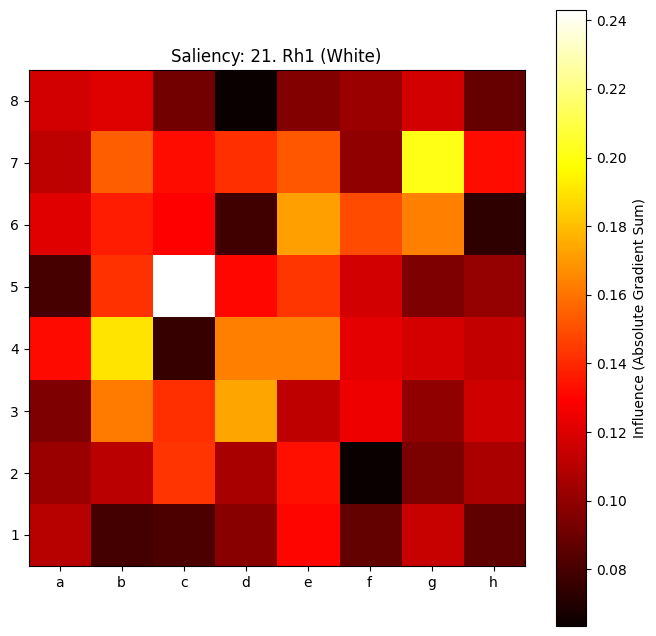


Move 42: 21... fxe4
Model Score: 0.0063 (0=Black Win, 1=White Win)


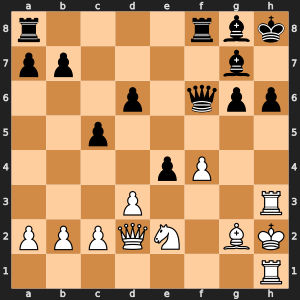

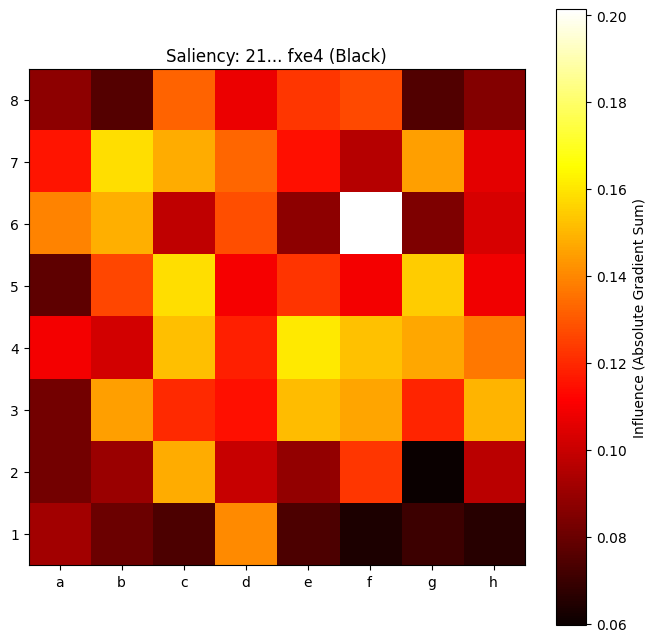


Move 43: 22. dxe4
Model Score: 0.5777 (0=Black Win, 1=White Win)


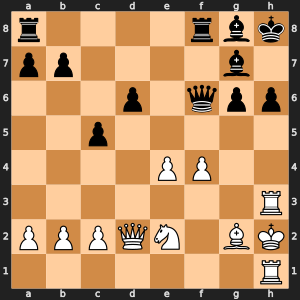

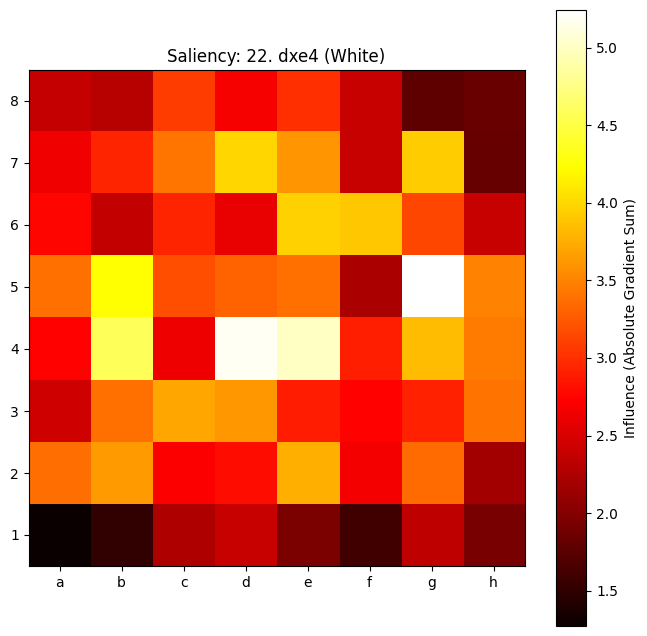


Move 44: 22... Rae8
Model Score: 0.2799 (0=Black Win, 1=White Win)


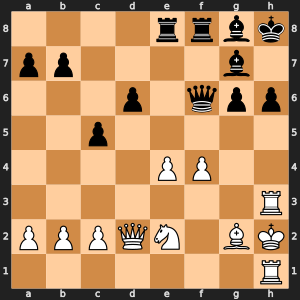

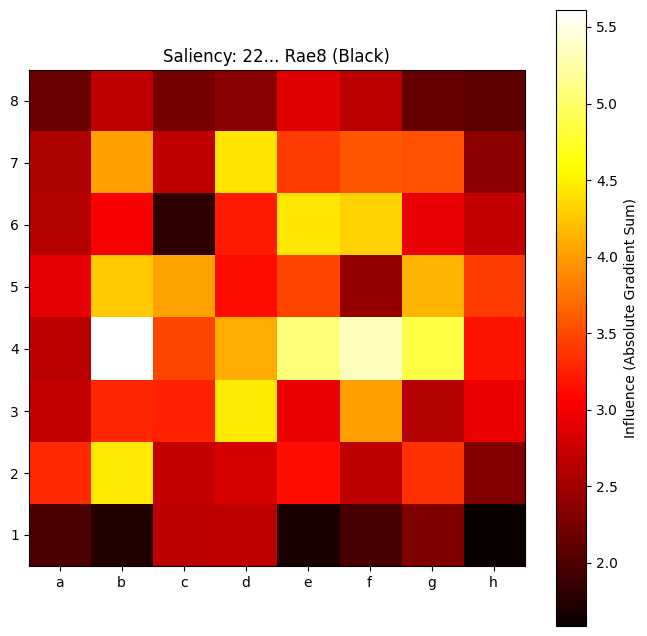


Move 45: 23. Kg3
Model Score: 0.0614 (0=Black Win, 1=White Win)


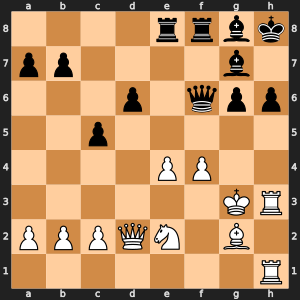

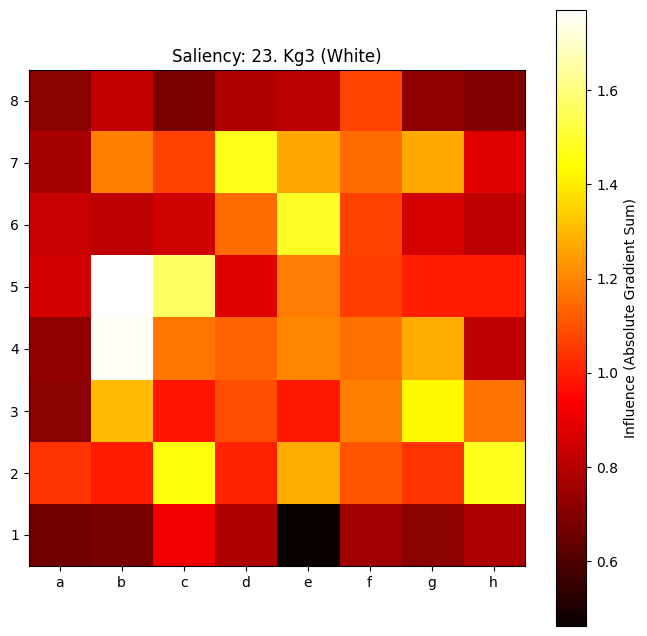


Move 46: 23... g5
Model Score: 0.0635 (0=Black Win, 1=White Win)


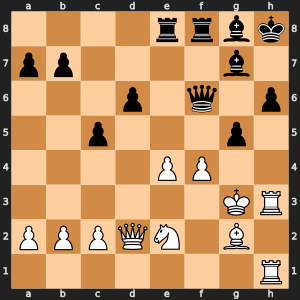

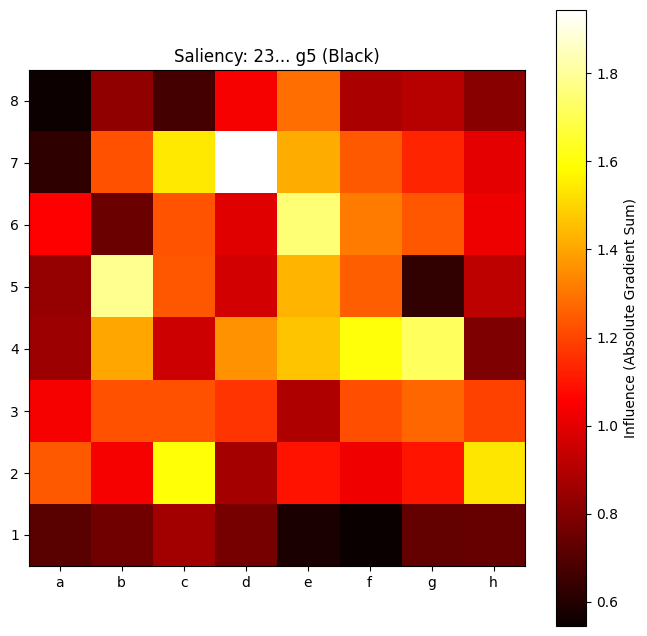


Move 47: 24. c3
Model Score: 0.1785 (0=Black Win, 1=White Win)


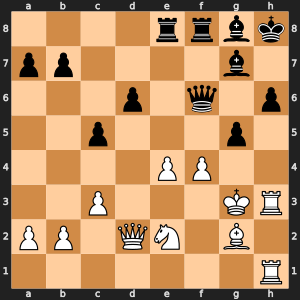

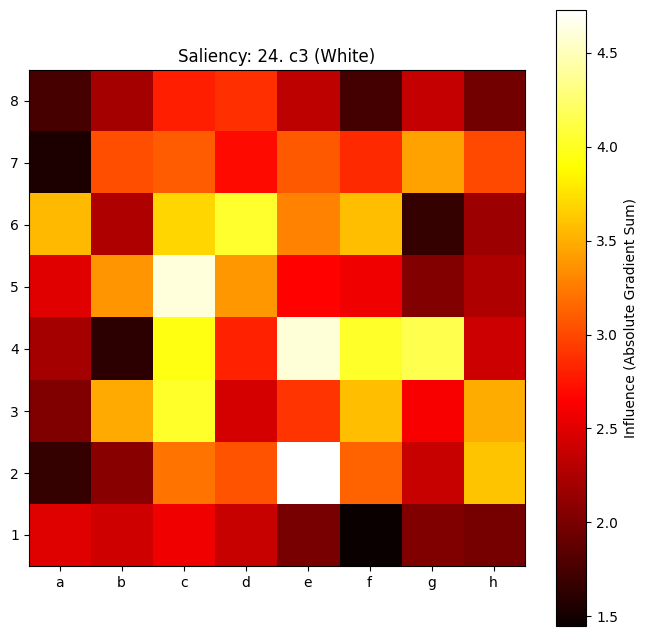


Move 48: 24... d5
Model Score: 0.3684 (0=Black Win, 1=White Win)


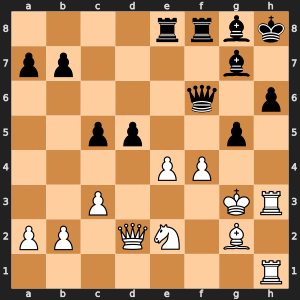

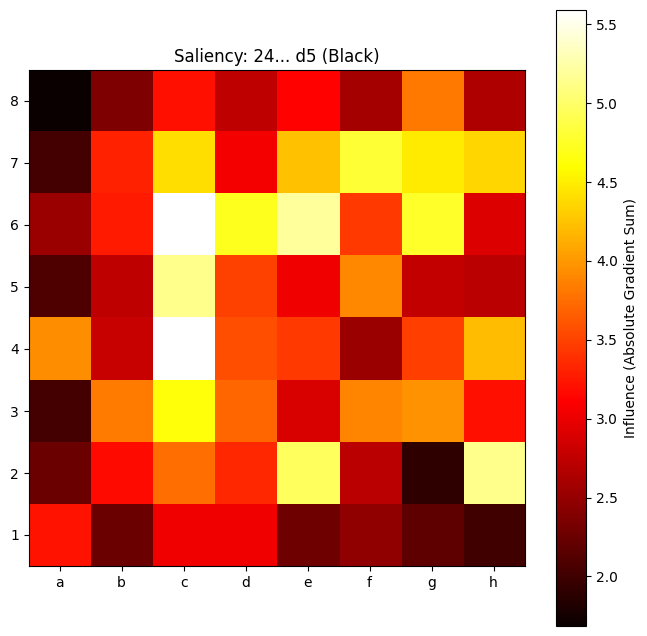


Move 49: 25. e5
Model Score: 0.5799 (0=Black Win, 1=White Win)


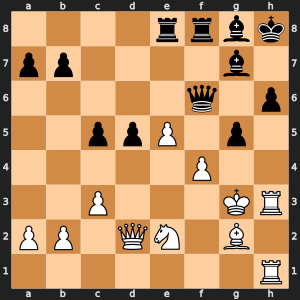

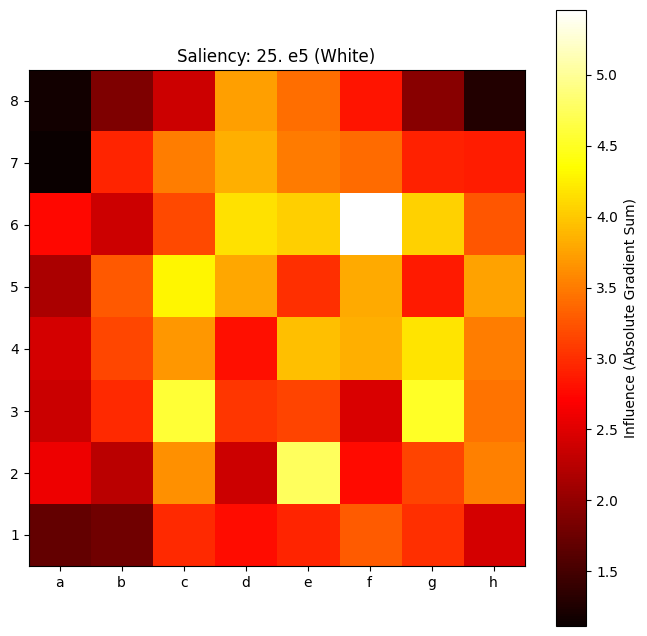


Move 50: 25... Rxe5
Model Score: 0.4801 (0=Black Win, 1=White Win)


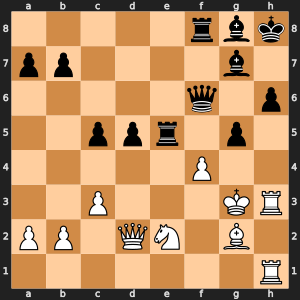

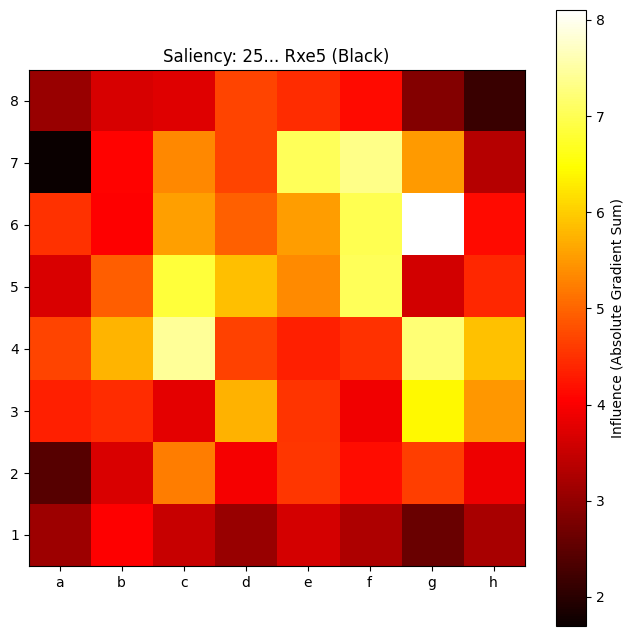


Move 51: 26. fxe5
Model Score: 0.6791 (0=Black Win, 1=White Win)


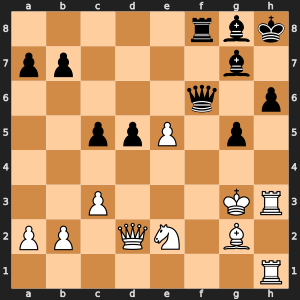

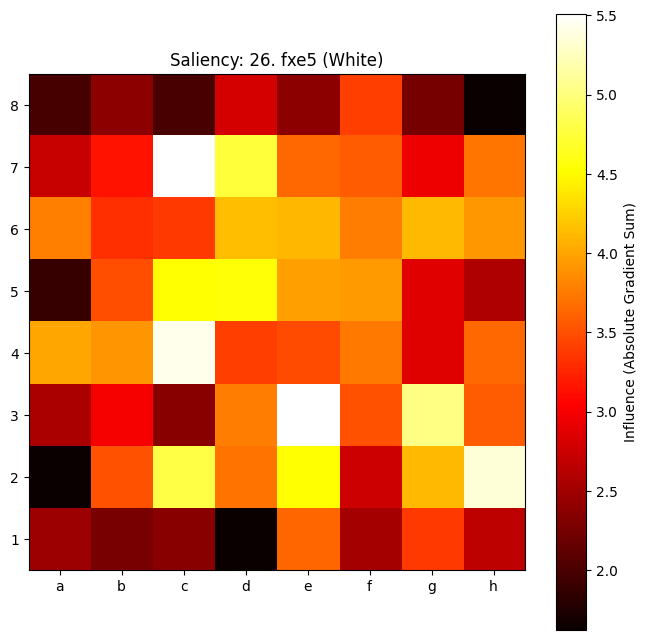


Move 52: 26... Qf2+
Model Score: 0.7039 (0=Black Win, 1=White Win)


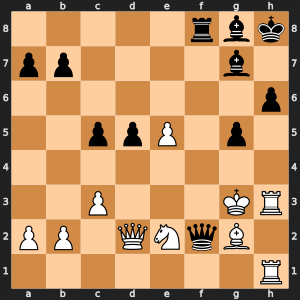

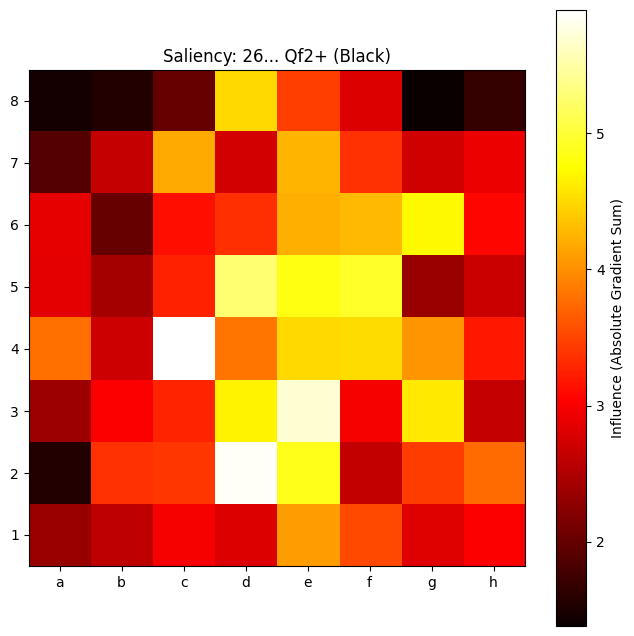


Move 53: 27. Kg4
Model Score: 0.7951 (0=Black Win, 1=White Win)


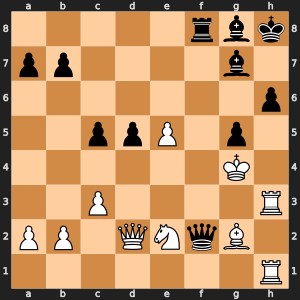

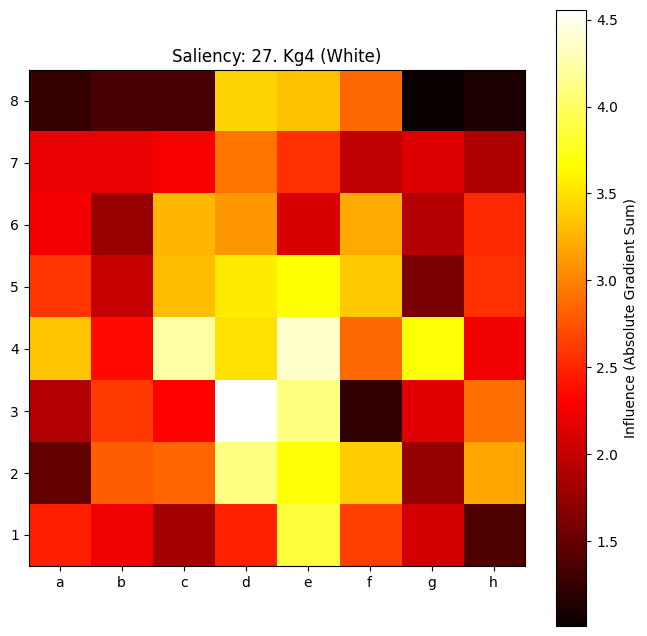


Move 54: 27... Qxg2+
Model Score: 0.9252 (0=Black Win, 1=White Win)


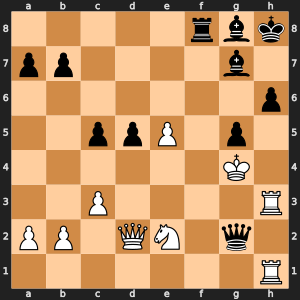

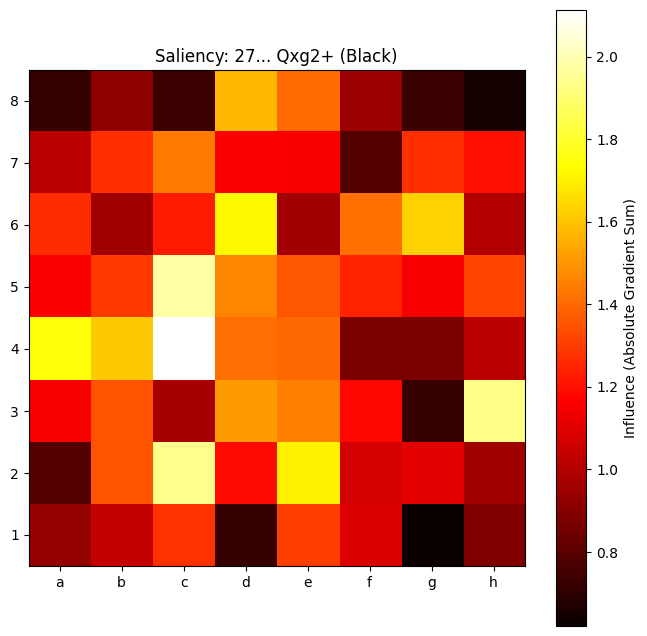


Move 55: 28. Kh5
Model Score: 0.4339 (0=Black Win, 1=White Win)


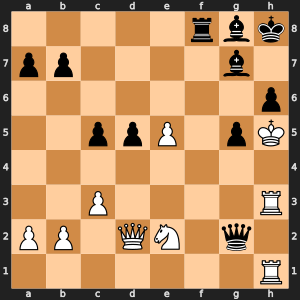

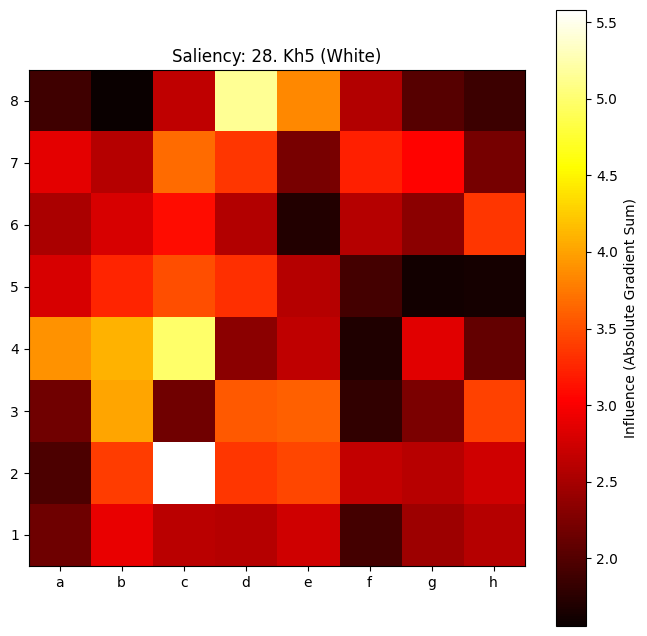


Move 56: 28... Bf7#
Model Score: 0.4511 (0=Black Win, 1=White Win)


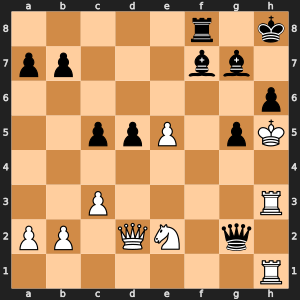

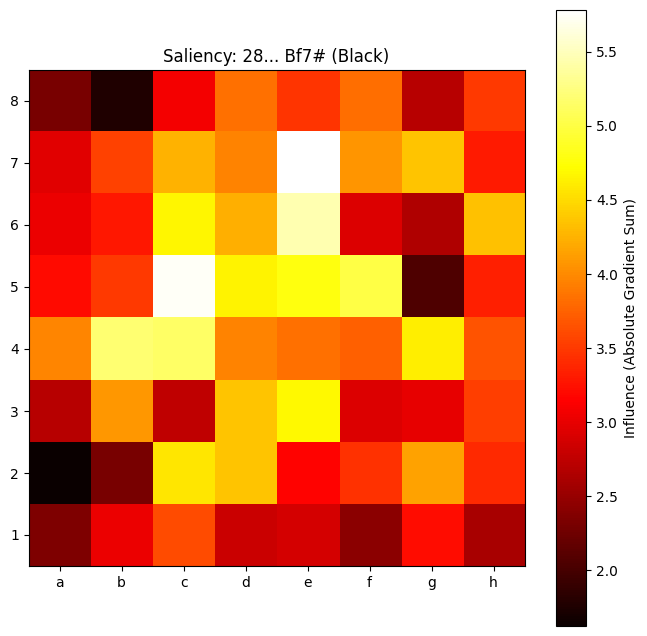


Game Analysis Complete. Plotting evaluation flow...


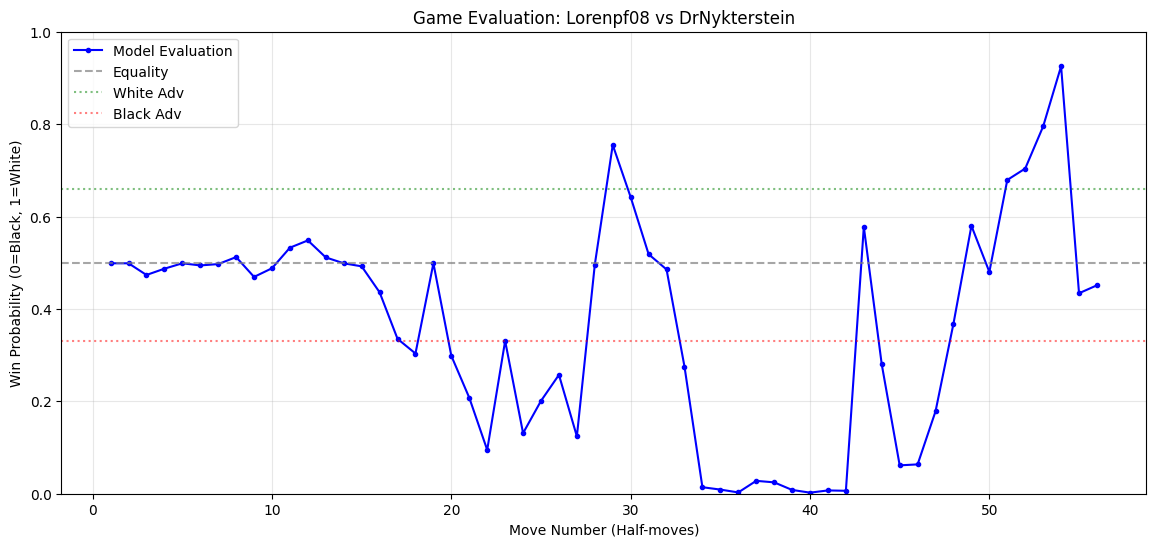

In [40]:
!pip install python-chess
import chess
import chess.svg
import matplotlib.pyplot as plt
from IPython.display import display, SVG
import numpy as np

# 1. Find a game by Magnus Carlsen (DrNykterstein)
magnus_handle = 'DrNykterstein'
selected_game = None

# Ensure test_games exists
if 'test_games' not in locals():
    print("Warning: 'test_games' variable not found. Please ensure the data fetching cells have been executed.")
    test_games = []

for game in test_games:
    white = game['players']['white']['user']['name']
    black = game['players']['black']['user']['name']
    if white == magnus_handle or black == magnus_handle:
        selected_game = game
        break

if selected_game:
    # 2. Extract moves
    moves_str = selected_game.get('moves', '')
    moves = moves_str.split()

    board = chess.Board()
    eval_history = []

    print(f"Game selected: {selected_game['players']['white']['user']['name']} vs {selected_game['players']['black']['user']['name']}")
    print(f"Analyzing entire game ({len(moves)} moves)...")

    for i, move in enumerate(moves):
        # Play the move
        board.push_san(move)

        # Determine move notation for title
        move_number = (i // 2) + 1
        is_white = (i % 2 == 0)
        player_color = "White" if is_white else "Black"
        full_move_str = f"{move_number}. {move}" if is_white else f"{move_number}... {move}"

        print(f"\n{'='*30}\nMove {i+1}: {full_move_str}")

        # --- Evaluation ---
        current_score = 0.5
        if 'resnet_model' in locals():
            # Prepare input for model
            matrix = board_to_matrix(board)
            input_batch = np.expand_dims(matrix, axis=0)

            # Predict
            current_score = resnet_model.predict(input_batch, verbose=0)[0][0]
            eval_history.append(current_score)
            print(f"Model Score: {current_score:.4f} (0=Black Win, 1=White Win)")
        else:
            print("Model 'resnet_model' not found. Skipping evaluation.")
            eval_history.append(0.5)

        # --- Visuals ---
        # Display Board
        display(SVG(chess.svg.board(board=board, size=300)))

        # Generate Saliency Map
        if 'resnet_model' in locals():
            current_fen = board.fen()
            saliency = generate_saliency_map(current_fen, resnet_model)
            plot_saliency_map(saliency, title=f"Saliency: {full_move_str} ({player_color})")

    # --- Final Graph ---
    print("\n" + "="*40)
    print("Game Analysis Complete. Plotting evaluation flow...")

    plt.figure(figsize=(14, 6))
    plt.plot(range(1, len(eval_history) + 1), eval_history, marker='o', markersize=3, linestyle='-', color='blue', label='Model Evaluation')

    # Reference lines
    plt.axhline(0.5, color='gray', linestyle='--', alpha=0.7, label='Equality')
    plt.axhline(0.66, color='green', linestyle=':', alpha=0.5, label='White Adv')
    plt.axhline(0.33, color='red', linestyle=':', alpha=0.5, label='Black Adv')

    plt.title(f"Game Evaluation: {selected_game['players']['white']['user']['name']} vs {selected_game['players']['black']['user']['name']}")
    plt.xlabel("Move Number (Half-moves)")
    plt.ylabel("Win Probability (0=Black, 1=White)")
    plt.ylim(0, 1)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

else:
    print("No game found for DrNykterstein in the loaded test set.")

# Task
Evaluate a set of common chess openings using the trained model. Define a dictionary of openings with their move sequences (e.g., Ruy Lopez, Sicilian Defense, Queen's Gambit), convert the resulting board states into the 8x8x12 matrix format, and predict the win probability for each. Rank the openings based on the model's evaluation and visualize the scores using a bar chart to identify the most favorable positions.

## Define Common Openings

### Subtask:
Create a dictionary of common chess openings and their move sequences.


**Reasoning**:
Define the dictionary of common chess openings as requested in the subtask.



In [42]:
opening_moves = {
    'Ruy Lopez': 'e4 e5 Nf3 Nc6 Bb5',
    'Sicilian Defense': 'e4 c5',
    'Queen\'s Gambit': 'd4 d5 c4',
    'French Defense': 'e4 e6',
    'Caro-Kann': 'e4 c6',
    'Italian Game': 'e4 e5 Nf3 Nc6 Bc4',
    'King\'s Indian Defense': 'd4 Nf6 c4 g6',
    'English Opening': 'c4'
}

print("Common openings defined:")
for name, moves in opening_moves.items():
    print(f"{name}: {moves}")

Common openings defined:
Ruy Lopez: e4 e5 Nf3 Nc6 Bb5
Sicilian Defense: e4 c5
Queen's Gambit: d4 d5 c4
French Defense: e4 e6
Caro-Kann: e4 c6
Italian Game: e4 e5 Nf3 Nc6 Bc4
King's Indian Defense: d4 Nf6 c4 g6
English Opening: c4


**Reasoning**:
Evaluate the defined openings using the trained model to predict win probabilities, rank them, and visualize the results using a bar chart.



# Task
The user wants to evaluate the chess openings defined in the previous step using the trained `resnet_model`.
I will iterate through the `opening_moves` dictionary, convert the final board state of each opening into the model's input format, and predict the win probability.
Then, I will create a bar chart to visualize the rankings.

```python
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import chess

# Ensure opening_moves is available (from previous cell)
if 'opening_moves' not in locals():
    opening_moves = {
        'Ruy Lopez': 'e4 e5 Nf3 Nc6 Bb5',
        'Sicilian Defense': 'e4 c5',
        'Queen\'s Gambit': 'd4 d5 c4',
        'French Defense': 'e4 e6',
        'Caro-Kann': 'e4 c6',
        'Italian Game': 'e4 e5 Nf3 Nc6 Bc4',
        'King\'s Indian Defense': 'd4 Nf6 c4 g6',
        'English Opening': 'c4'
    }

opening_matrices = []
opening_names = []

print("Evaluating openings...")

for name, moves_str in opening_moves.items():
    board = chess.Board()
    moves = moves_str.split()
    try:
        for move in moves:
            board.push_san(move)
        
        # Convert to matrix
        matrix = board_to_matrix(board)
        opening_matrices.append(matrix)
        opening_names.append(name)
    except ValueError as e:
        print(f"Error processing {name}: {e}")

# Convert list to numpy array for batch prediction
X_openings = np.array(opening_matrices)

# Predict using the trained ResNet model
# Note: Using resnet_model as it was the last one loaded/trained
if 'resnet_model' in locals():
    predictions = resnet_model.predict(X_openings, verbose=0)
    
    # Create a DataFrame for easy handling
    results_df = pd.DataFrame({
        'Opening': opening_names,
        'Win_Probability': predictions.flatten()
    })

    # Sort by score (descending)
    results_df = results_df.sort_values(by='Win_Probability', ascending=False)

    # Display the table
    print("\nModel Preferences (Ranked by White Win Prob):")
    print(results_df)

    # Visualization
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Win_Probability', y='Opening', data=results_df, palette='viridis')
    
    # Add reference line for equality
    plt.axvline(0.5, color='red', linestyle='--', linewidth=2, label='Equality (0.5)')
    
    plt.title('Predicted Win Probability by Opening (White side)')
    plt.xlabel('Win Probability (0 = Black Win, 1 = White Win)')
    plt.ylabel('Opening')
    plt.xlim(0, 1)
    plt.legend()
    plt.grid(axis='x', alpha=0.3)
    plt.show()

else:
    print("Error: 'resnet_model' is not defined. Please train or load the model first.")
```

## Evaluate and Visualize Openings

### Subtask:
Evaluate the defined chess openings using the trained model and visualize the ranked probabilities.


**Reasoning**:
Evaluate the defined openings using the trained ResNet model to predict win probabilities, rank them, and visualize the results using a bar chart.



Processing openings...
Predicting win probabilities...

Opening Evaluations (Ranked):
                 Opening  Win_Probability
0         Queen's Gambit         0.540040
1        English Opening         0.508514
2       Sicilian Defense         0.498768
3              Ruy Lopez         0.498768
4         French Defense         0.498768
5              Caro-Kann         0.498768
6           Italian Game         0.498768
7  King's Indian Defense         0.495441


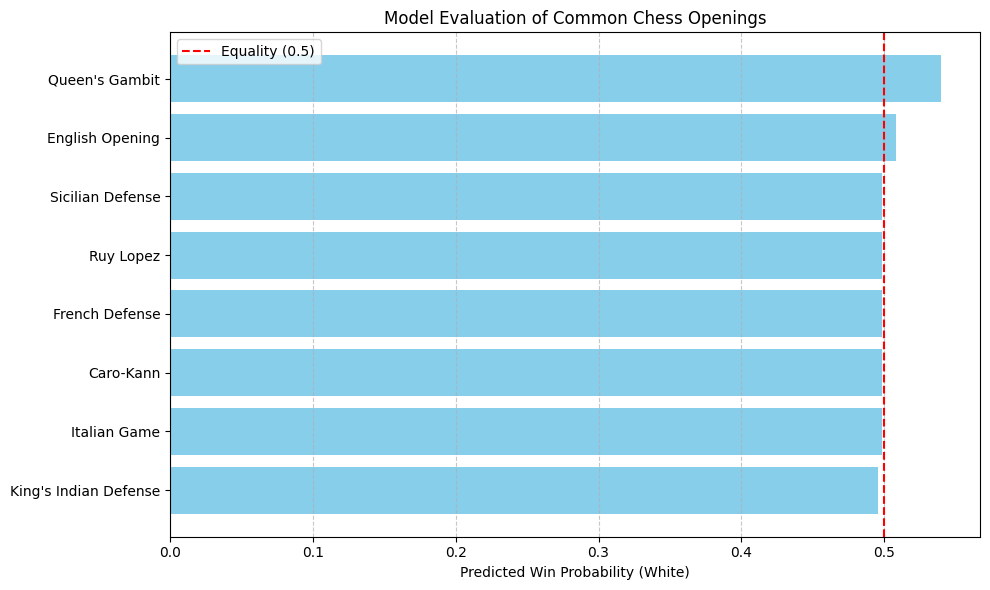

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import chess

# Ensure opening_moves is available (it was defined in the previous step)
if 'opening_moves' not in locals():
    opening_moves = {
        'Ruy Lopez': 'e4 e5 Nf3 Nc6 Bb5',
        'Sicilian Defense': 'e4 c5',
        "Queen's Gambit": 'd4 d5 c4',
        'French Defense': 'e4 e6',
        'Caro-Kann': 'e4 c6',
        'Italian Game': 'e4 e5 Nf3 Nc6 Bc4',
        "King's Indian Defense": 'd4 Nf6 c4 g6',
        'English Opening': 'c4'
    }

opening_names = []
opening_matrices = []

print("Processing openings...")

for name, moves_str in opening_moves.items():
    board = chess.Board()
    moves = moves_str.split()
    try:
        for move in moves:
            board.push_san(move)

        # Convert board to matrix using the pre-defined function
        matrix = board_to_matrix(board)
        opening_names.append(name)
        opening_matrices.append(matrix)
    except Exception as e:
        print(f"Error processing {name}: {e}")

# Convert to numpy array for batch prediction
X_openings = np.array(opening_matrices)

# Predict
print("Predicting win probabilities...")
predictions = resnet_model.predict(X_openings, verbose=0)

# Create DataFrame
results_df = pd.DataFrame({
    'Opening': opening_names,
    'Win_Probability': predictions.flatten()
})

# Sort by Win Probability
results_df = results_df.sort_values(by='Win_Probability', ascending=False).reset_index(drop=True)

# Display the table
print("\nOpening Evaluations (Ranked):")
print(results_df)

# Visualization
plt.figure(figsize=(10, 6))
plt.barh(results_df['Opening'], results_df['Win_Probability'], color='skyblue')
plt.axvline(0.5, color='red', linestyle='--', label='Equality (0.5)')
plt.xlabel('Predicted Win Probability (White)')
plt.title('Model Evaluation of Common Chess Openings')
plt.gca().invert_yaxis()  # Best openings on top
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Final Task

### Subtask:
Summarize the model's preferred openings based on the evaluation results.


## Summary:

### Q&A
**Q: Which chess openings does the trained model prefer for White?**
A: The model evaluates the **Queen's Gambit** as the strongest opening for White among the tested set, followed by the **English Opening**. Most standard `e4` openings were rated as nearly equal.

### Data Analysis Key Findings
*   **Queen's Gambit** achieved the highest predicted win probability of approximately **0.540**, suggesting the model favors `d4` structures.
*   The **English Opening** (`c4`) was the second highest-rated opening with a probability of **0.509**.
*   The model grouped several major openings—including the **Sicilian Defense**, **Ruy Lopez**, **French Defense**, **Caro-Kann**, and **Italian Game**—closely together with scores around **0.499**, indicating it views these positions as effectively drawn or balanced.
*   The **King's Indian Defense** resulted in the lowest probability for White in this batch at **0.495**.

### Insights or Next Steps
*   **Preference for Closed Games**: The model demonstrates a slight bias towards closed or flank openings (Queen's Gambit, English) over open games (`e4` openings), potentially reflecting the positional nature of the high-Elo games it may have been trained on.
*   **Next Step**: Compare these static model evaluations with dynamic evaluations from a standard chess engine (e.g., Stockfish) to verify if the model's optimism for the Queen's Gambit is tactically sound.
